In [1]:
__author__ = "@Tssp"
__date__ = "21/10/21"
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from GPE_Split_Step_Fourier import GPE_Solver_2D
import os
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2

The ring soliton of radius $R$ can be easily modeled in cartesian coordinates as:

$$ \psi(r,t) = \left[ i\nu + \gamma^{-1} \tanh \left( \frac{r - (R + \nu t}{\gamma} \right)\right]e^{-it}.$$

Being $\gamma=\sqrt{1 - \nu^2}$ and $\nu$ the greyness, defined as the coefficient of the velocity of the soliton and the Bogoliubov speed of sound. In the special case of $\nu=0$ the soliton is called black. Here we solve the GPE for two solitons under a white noise.

In [16]:
Lx          = 64   # Domain size
Ly          = 64
Nx          = 256  # Number of grid points
Ny          = 256
dX          = Lx/Nx  # Cell size
dY          = Ly/Ny
x           = np.arange(-Lx/2, Lx/2, dX, dtype=complex)
y           = np.arange(-Ly/2, Ly/2, dY, dtype=complex)
X, Y        = np.meshgrid(x, y)
R           = np.sqrt(X**2 + Y**2) # Radius
dT          = 0.01 # Time step size
kx          = 2*pi*np.fft.fftfreq(Nx, d=dX)
ky          = 2*pi*np.fft.fftfreq(Ny, d=dY)
Kx, Ky      = np.meshgrid(kx, ky)
g           = 1
figure_path = 'Figures/Ring2D'
os.makedirs(figure_path, exist_ok=True)

In [17]:
def V(X):
    return -np.ones(X.shape)

V = V(X)

In [184]:
def ring(R, R0, nu=0):
    gamma = np.sqrt(1 - nu**2)
    return (1j*nu + np.tanh((R - R0)/gamma)/gamma)*np.ones(R.shape)

def noise(sigma):
    return np.random.normal(1, sigma, (Nx, Ny)).astype(complex)

psi0 = ring(R, 5, -0.5)*ring(R, 2, 0.5)*noise(0.02) # nu<0 -> Contracting ring

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$y[\\xi]$')

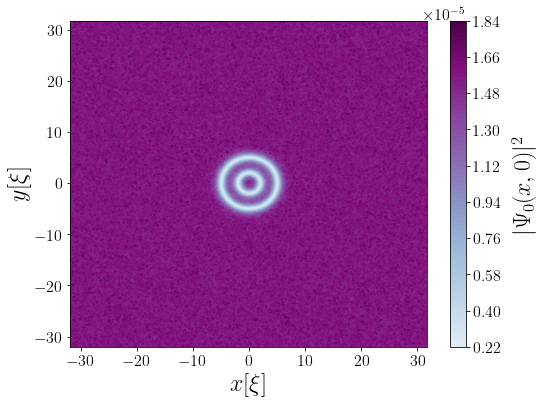

In [185]:
fig, ax = plt.subplots(figsize=(8,6))
c = ax.contourf(X, Y, np.abs(psi0)**2/np.sum(np.abs(psi0)**2), levels=100, cmap='BuPu', vmin=0)
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$|\Psi_0(x,0)|^2$', labelpad=10)
ax.set_xlabel(r'$x[\xi]$')
ax.set_ylabel(r'$y[\xi]$')
#.set_ylim(-5, 5)
#ax.set_xlim(-5, 5)

In [189]:
GPE = GPE_Solver_2D(X, Y, V, psi0, Kx, Ky)
GPE.run_and_plot(6000, dT, g)


        GPE Solver initialized for a GRID from x=-32.0 to x=31.75 and 
        y=-32.0 to y=-32.0
        hbar=1 
        m=1
        


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


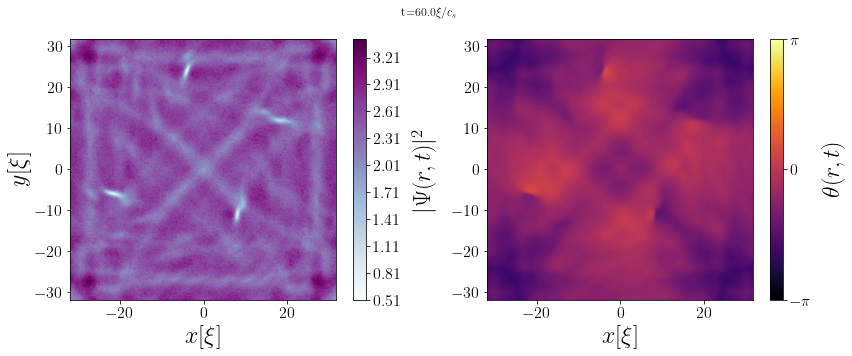

In [197]:
fig = plt.figure(figsize=(12,5), facecolor="white")

ax1 = plt.subplot(121)
cd = ax1.contourf(X, Y, GPE.prob_densities[6000,:,:], levels=100, cmap='BuPu')
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$|\Psi(r,t)|^2$', labelpad=10)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')

ax2 = plt.subplot(122)
cd = ax2.contourf(X, Y, np.angle(GPE.psi_x[6000,:,:]), levels=np.linspace(-np.pi, np.pi, 100), cmap='inferno')
cbar = plt.colorbar(cd, ticks=[-np.pi, 0, np.pi])
cbar.ax.set_yticklabels([r'$-\pi$', '0', r'$\pi$'])
cbar.ax.set_ylabel(r'$\theta(r, t)$', labelpad=10)
ax2.set_xlabel(r'$x[\xi]$')

plt.suptitle(f't={round(6000*dT, 2)}'+r'$\xi/c_s$')

plt.tight_layout()
#plt.savefig(figure_path+'/GPE_Ring2D_14000.png', dpi=200)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


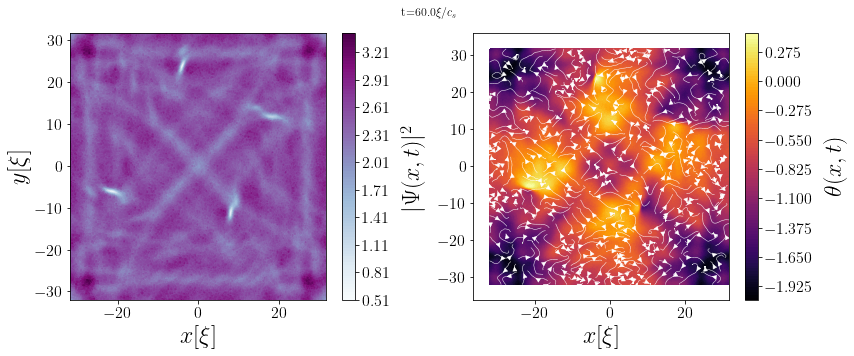

In [201]:
fig = plt.figure(figsize=(12,5), facecolor="white")

ax1 = plt.subplot(121)
cd = ax1.contourf(GPE.x, GPE.y, GPE.prob_densities[6000,:,:], levels=100, cmap='BuPu')
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$|\Psi(x,t)|^2$', labelpad=10)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')

ax2 = plt.subplot(122)
theta = np.angle(GPE.psi_x[6000,:,:])
cd = ax2.contourf(X, Y, theta, levels=100, cmap='inferno')
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$|\theta(x, y)|^2$', labelpad=10)

grad = np.gradient(theta)
ax2.streamplot(np.real(GPE.x), np.real(GPE.y), np.real(grad[0]), np.real(grad[1]), color='w',\
               density=[1,3], linewidth=0.5)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')
cbar.ax.set_ylabel(r'$\theta(x,t)$', labelpad=10)
ax2.set_xlabel(r'$x[\xi]$')

plt.suptitle(f't={6000*dT}'+r'$\xi/c_s$')

plt.tight_layout()

There is an oscillation of the phase that change from $-\pi$ to $\pi$, this is $\Delta \theta = 2\pi$. In the next cell we compute the temporal period of the oscillations.

(-3.14, 3.14)

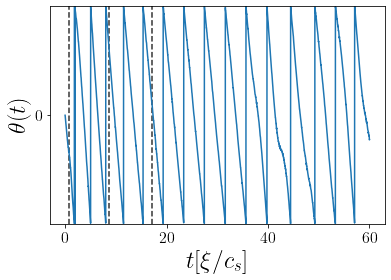

In [198]:
# 128 is de position of y=0
center = []
t = dT*np.linspace(0, 6001, 6001)
for i in range(len(GPE.psi_x)):
    center.append(np.angle(GPE.psi_x[i, 128, 128]))
plt.plot(t, center)
plt.vlines(t[68], -5, 5, color='k', linestyle='--', alpha=0.8)
plt.vlines(t[867], -5, 5, color='k', linestyle='--', alpha=0.8)
plt.vlines(t[1714], -5, 5, color='k', linestyle='--', alpha=0.8)
plt.xlabel(r'$t[\xi/c_s]$')
plt.ylabel(r'$\theta(t)$')
plt.yticks(ticks=[-np.pi, 0, np.pi], labels=[r'$-\pi$', '0', r'$\pi$'])
plt.ylim(-3.14, 3.14)

In [199]:
for i in range(len(center)-1):
    if np.sign(center[i]) != np.sign(center[i+1]):
        print(i)
print(f'\nPeriods:{round(t[867]-t[68], 2)}, {round(t[1714]-t[867], 2)}, {round(t[2716]-t[1714], 2)}. The time between oscillation increases!')

186
187
189
365
503
646
801
970
1152
1342
1537
1735
1933
2134
2338
2540
2745
2949
3158
3363
3565
3804
3979
4140
4445
4635
4923
5134
5328
5553
5707
5916

Periods:7.99, 8.47, 10.02. The time between oscillation increases!


# GIF

<ipython-input-202-8c70213484e2>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,8))


IndexError: index 6050 is out of bounds for axis 0 with size 6001

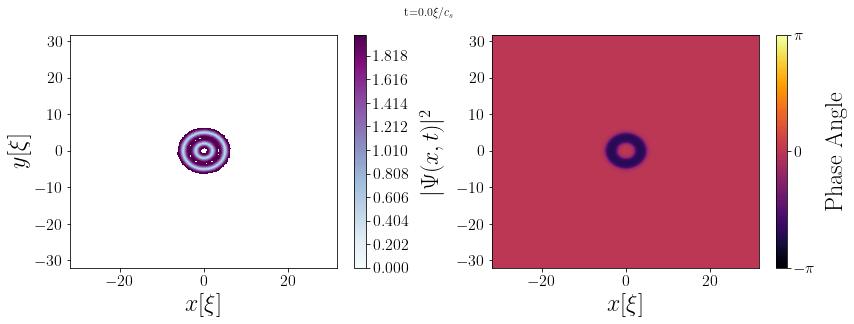

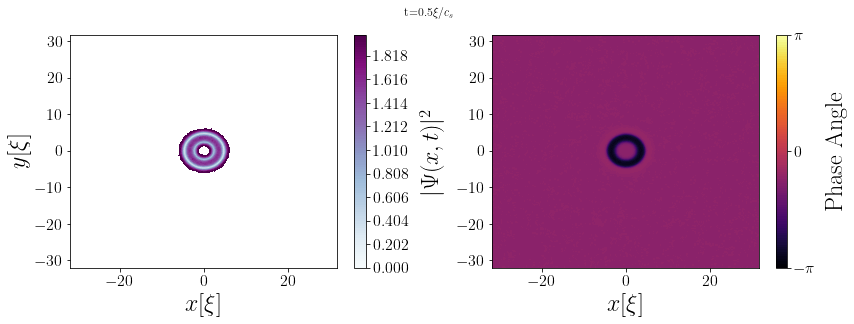

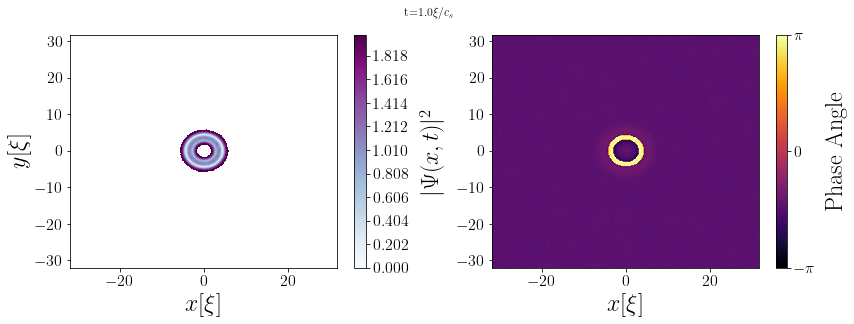

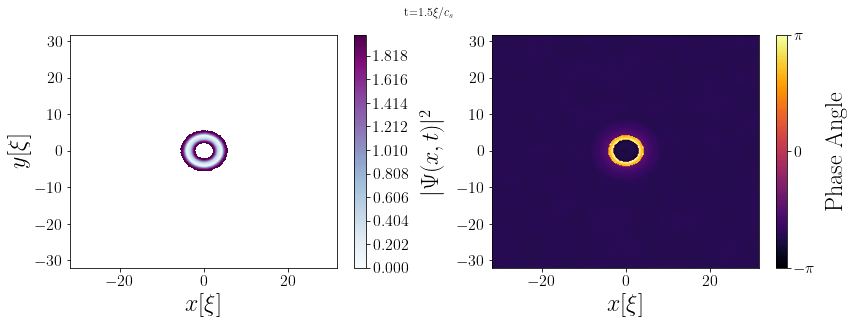

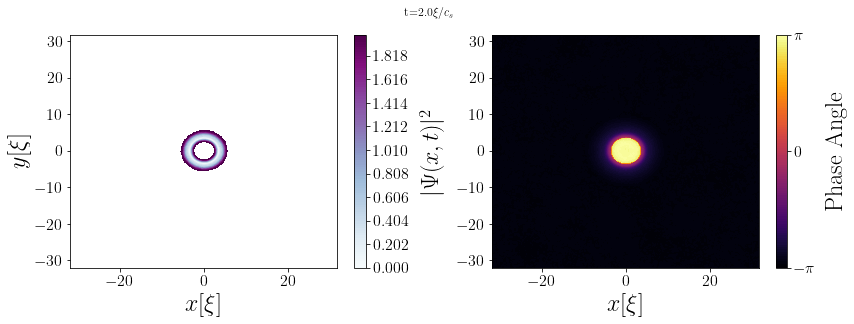

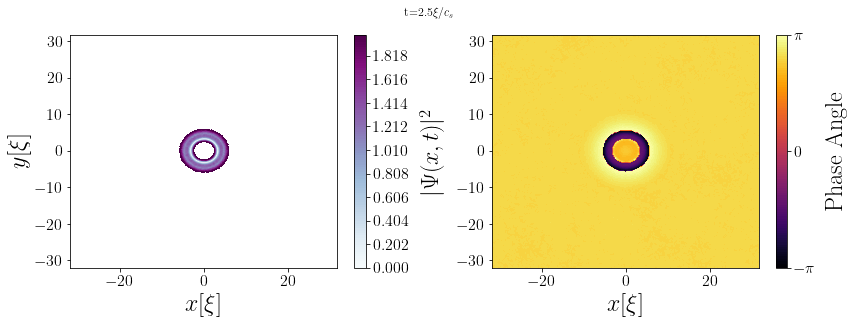

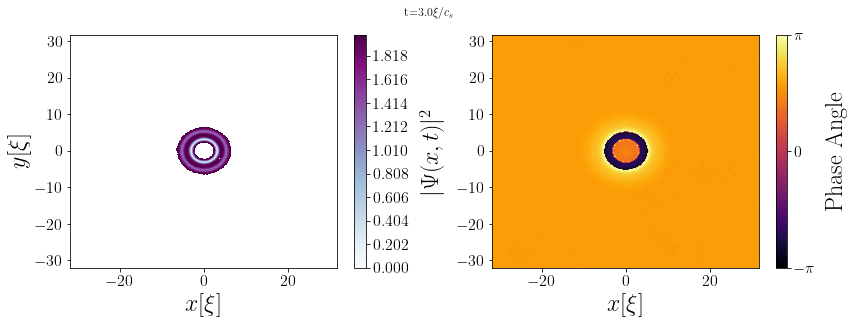

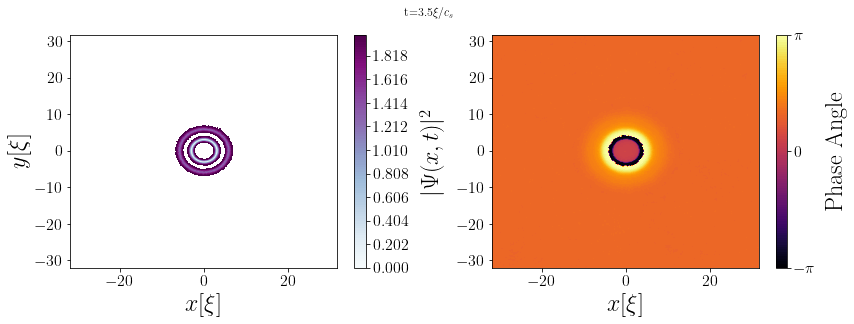

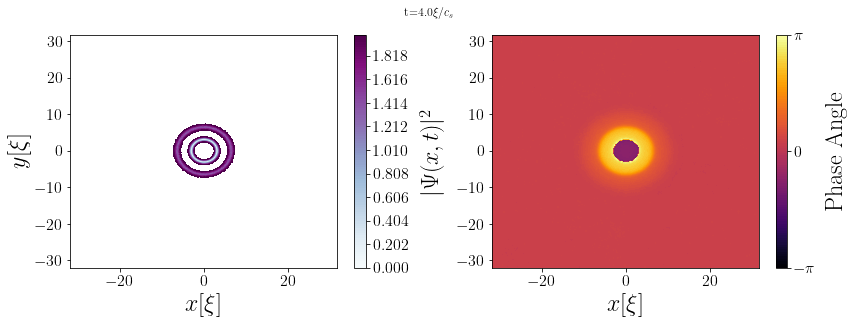

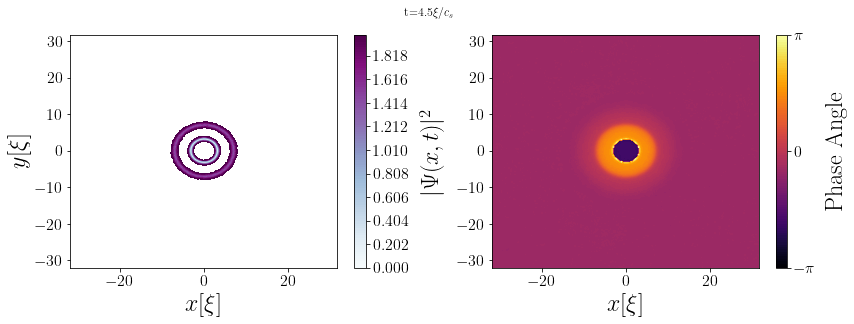

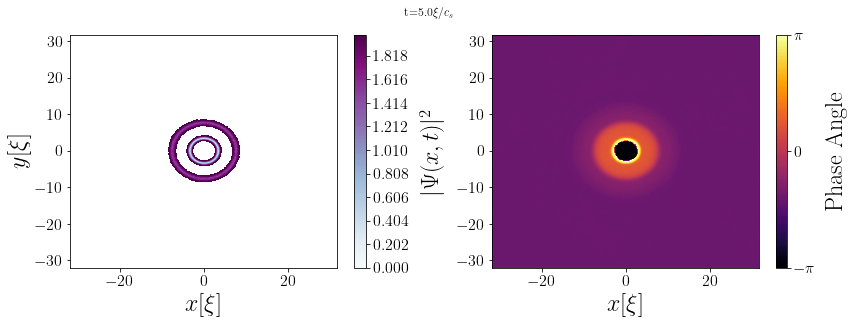

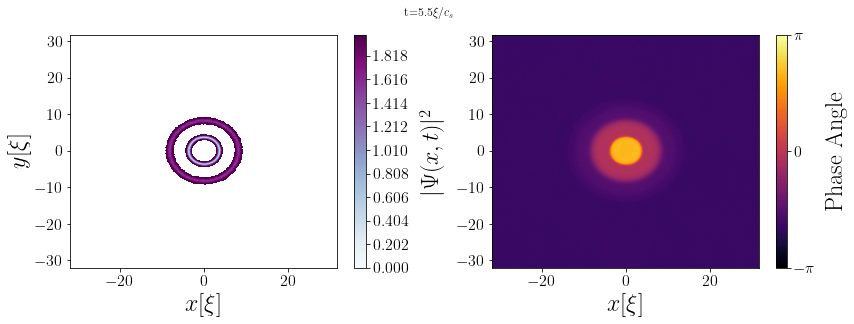

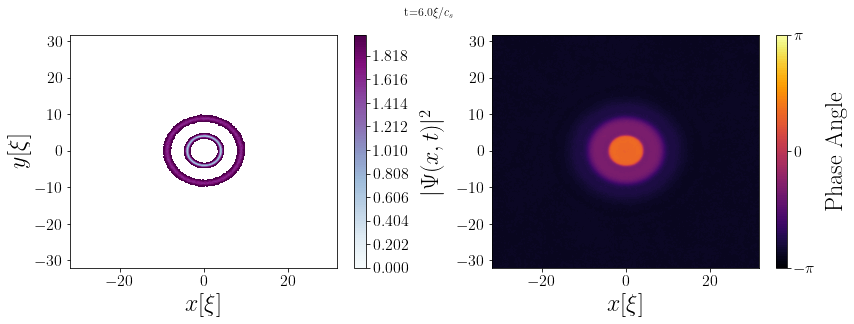

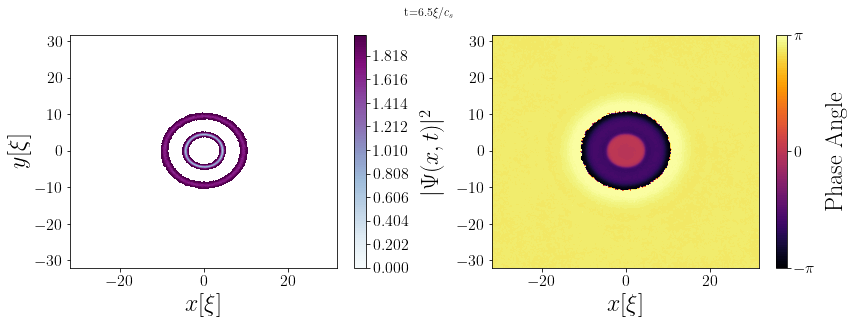

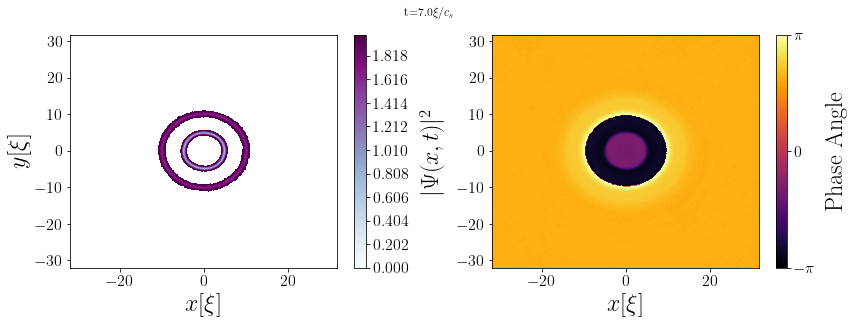

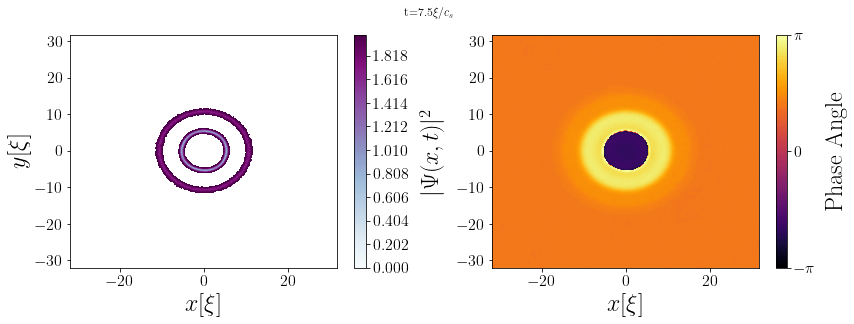

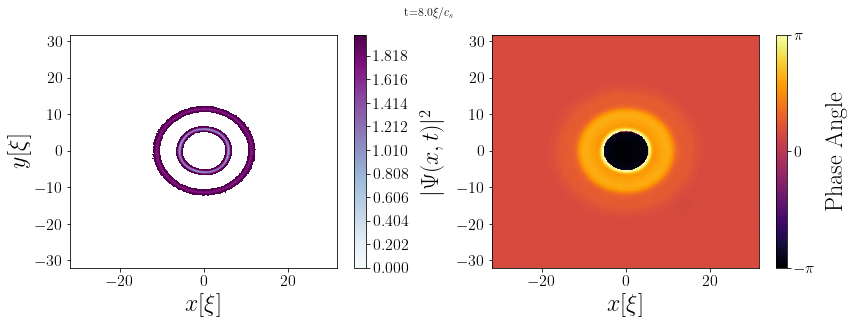

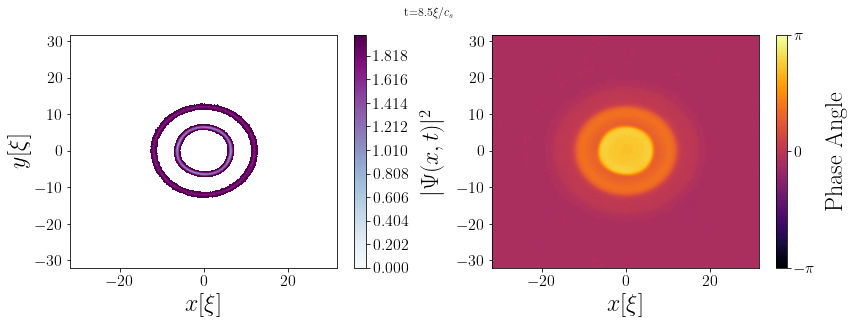

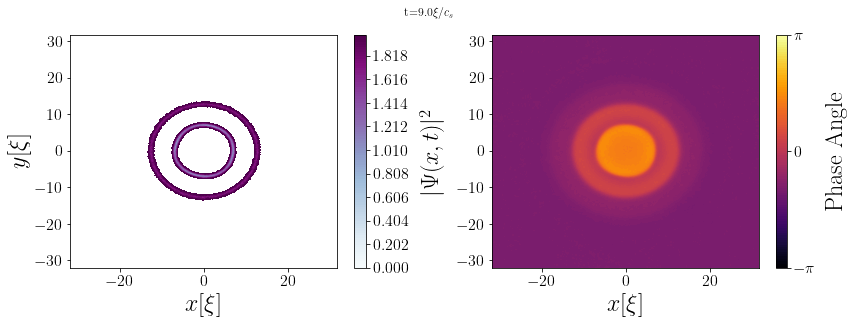

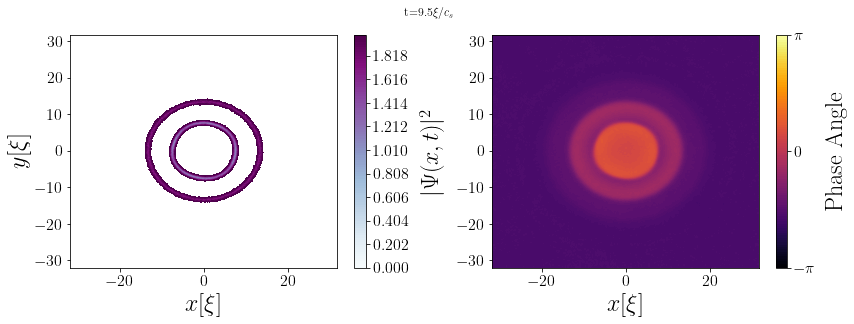

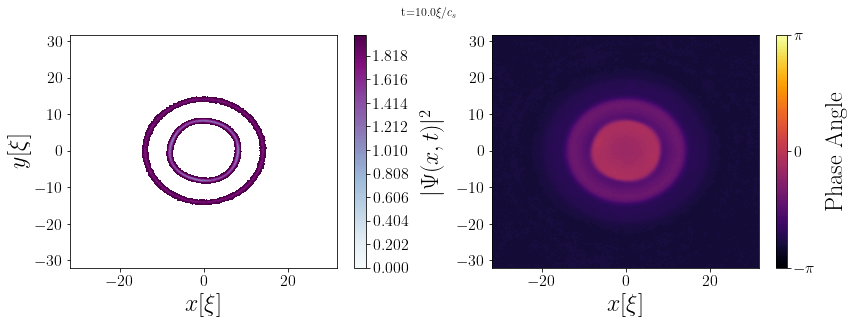

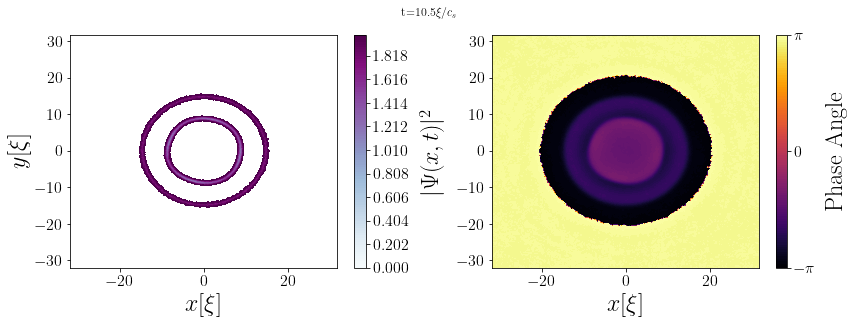

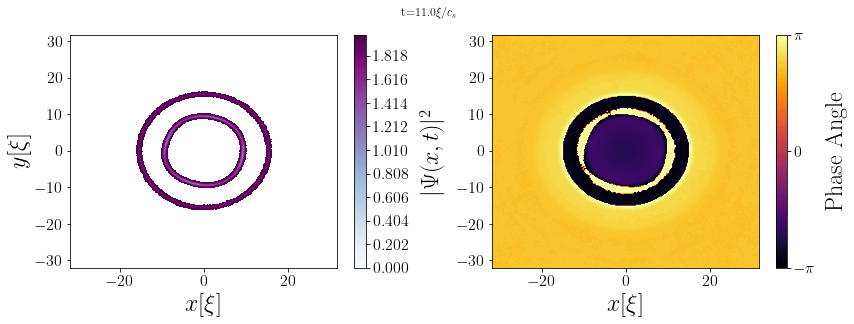

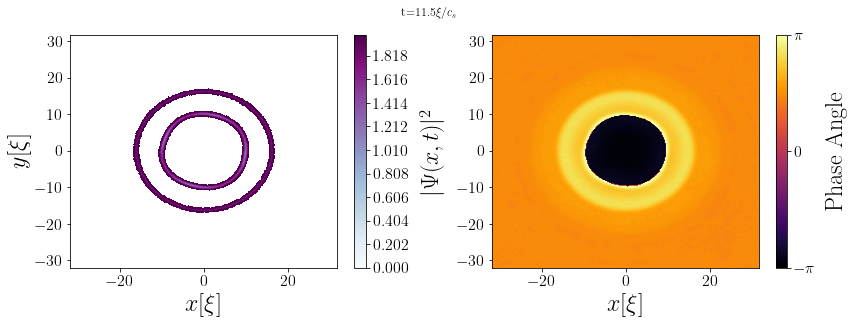

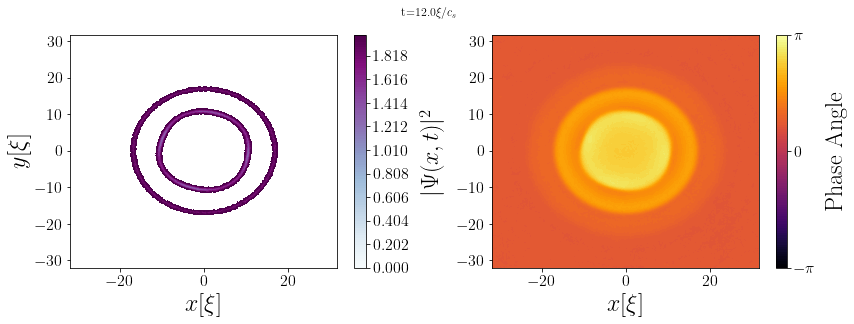

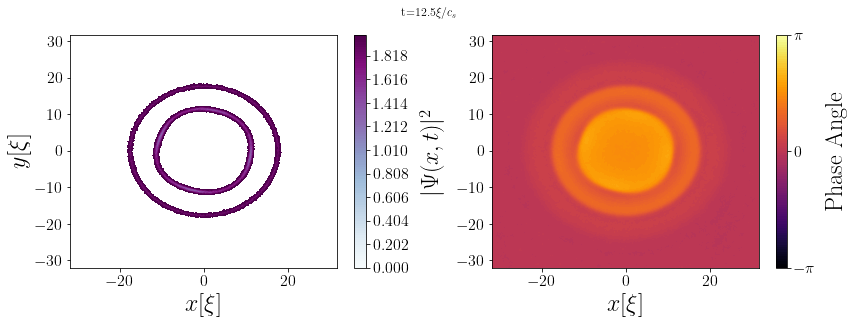

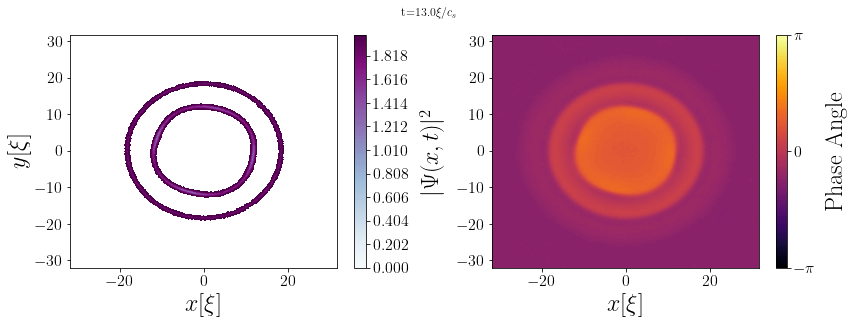

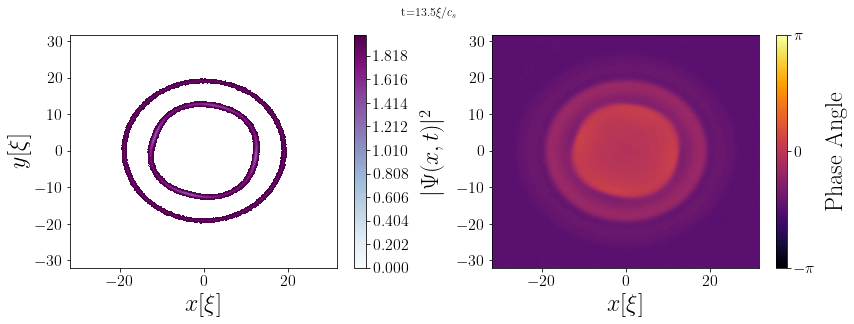

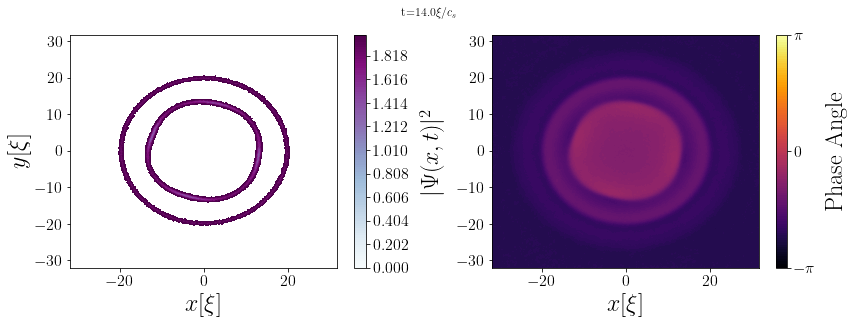

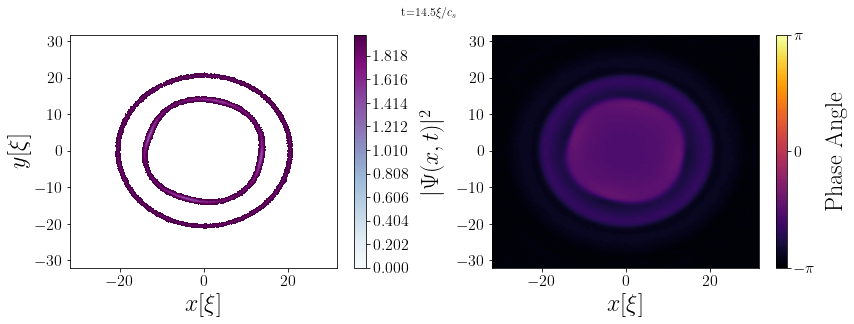

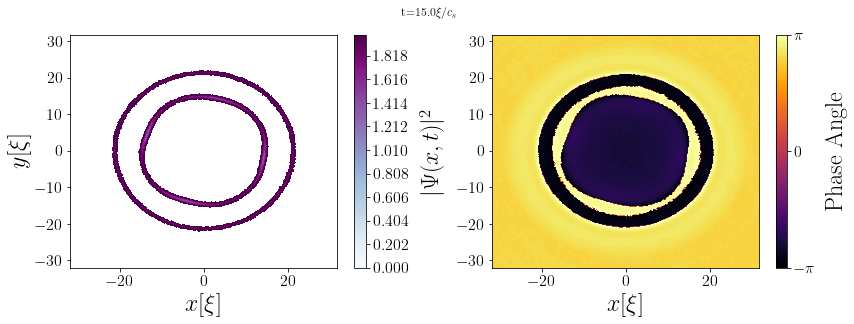

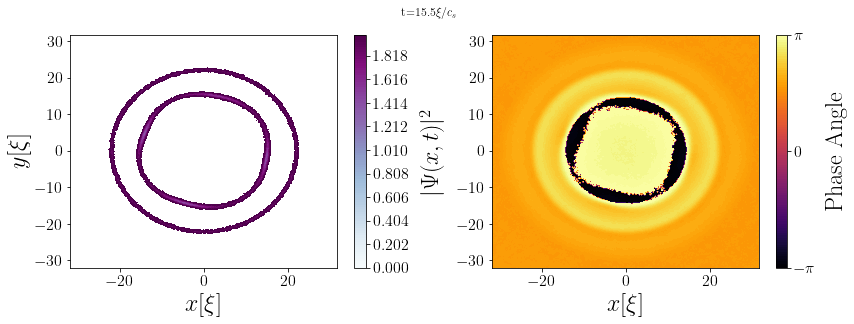

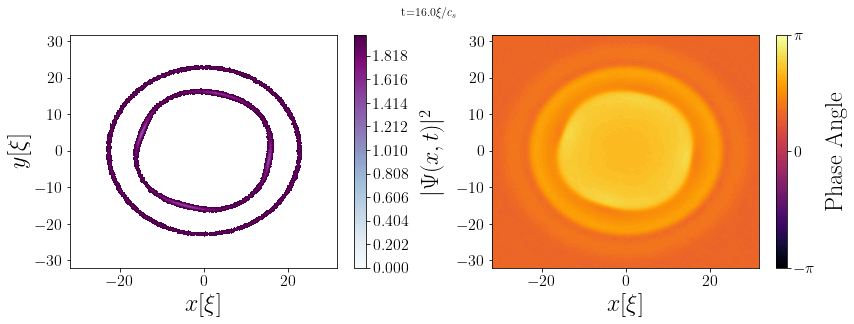

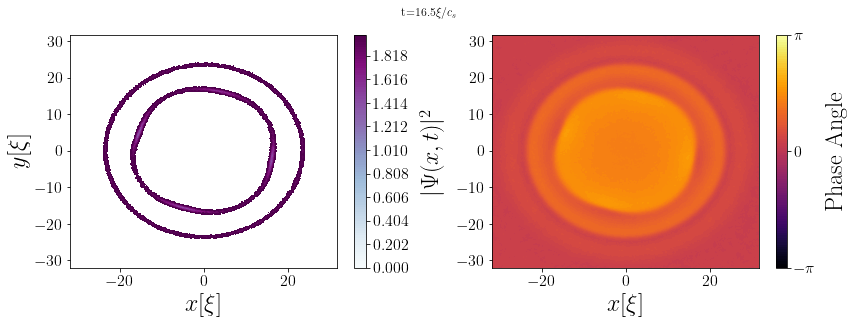

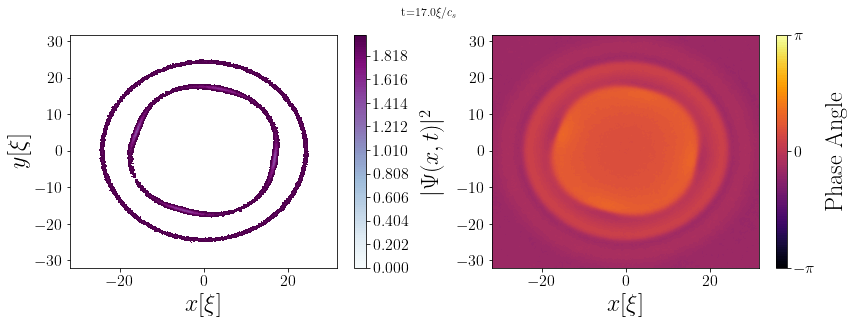

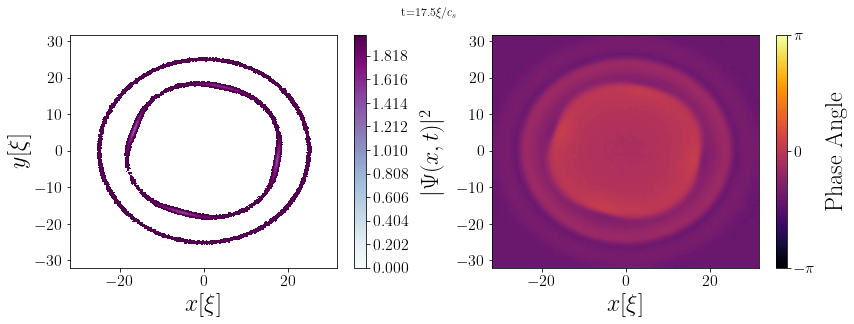

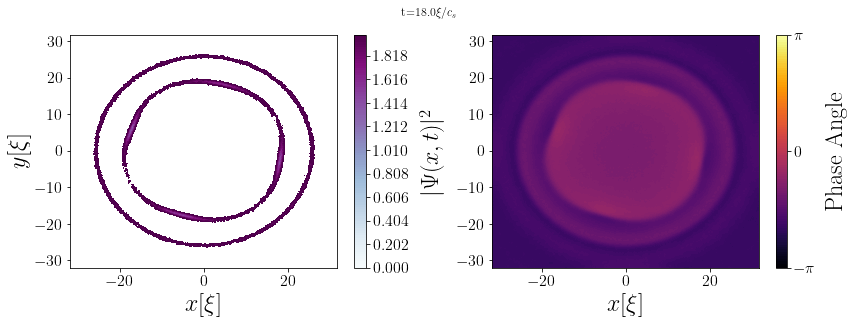

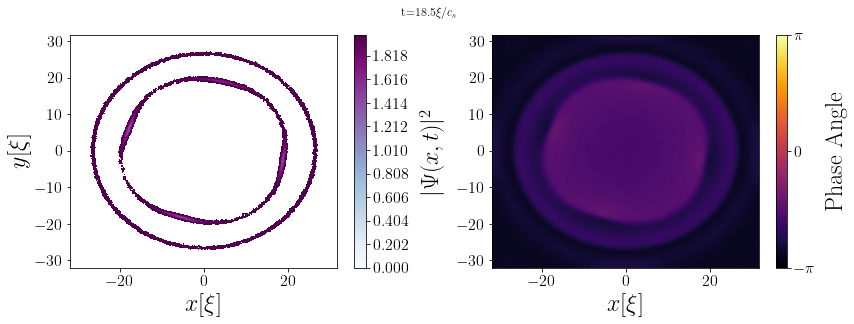

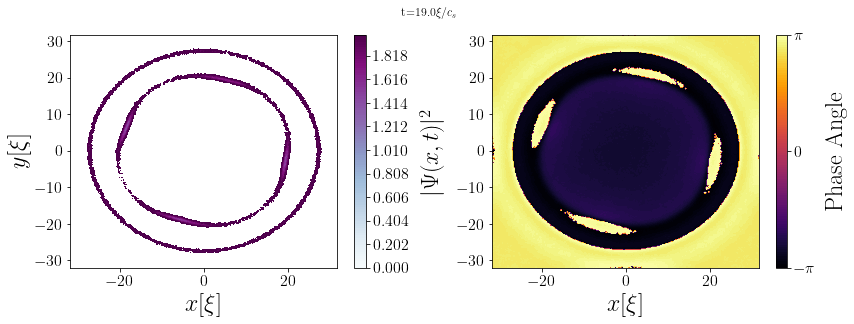

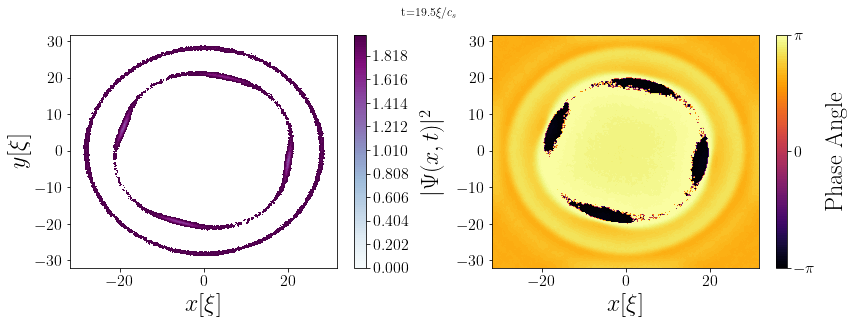

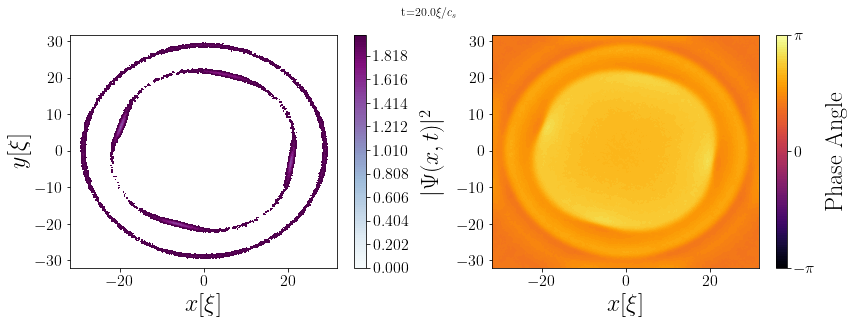

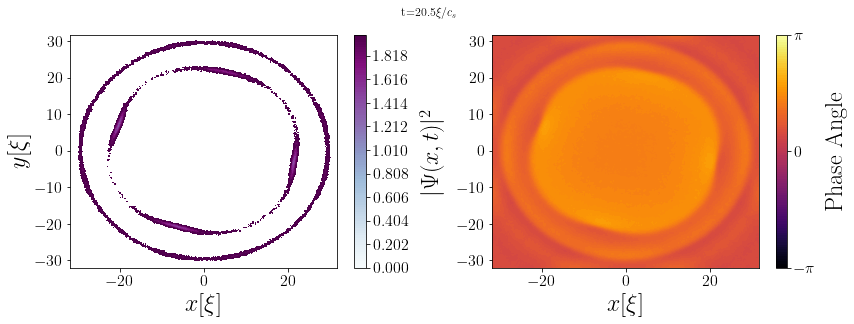

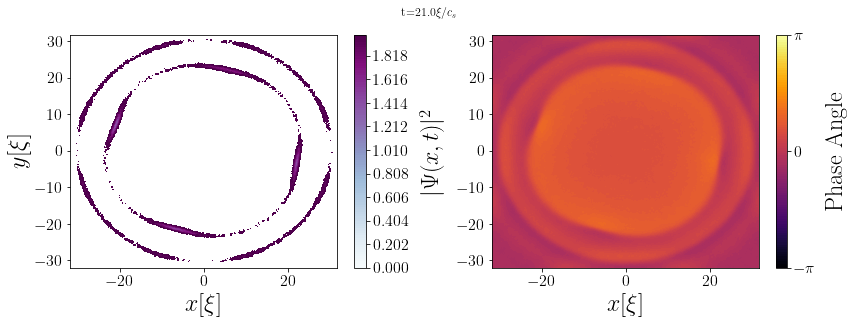

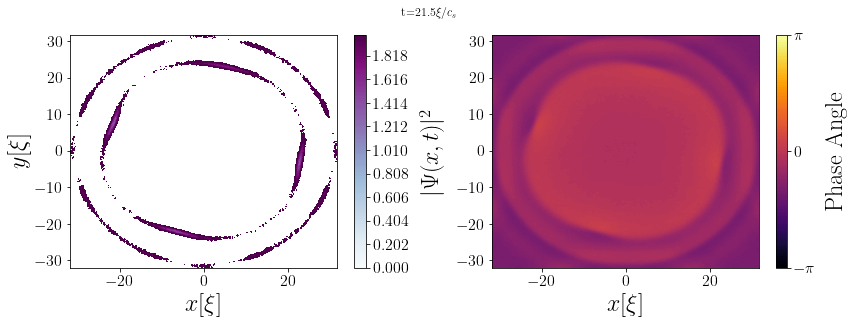

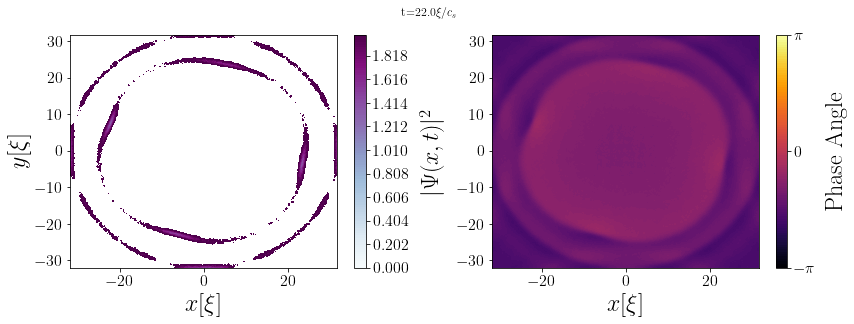

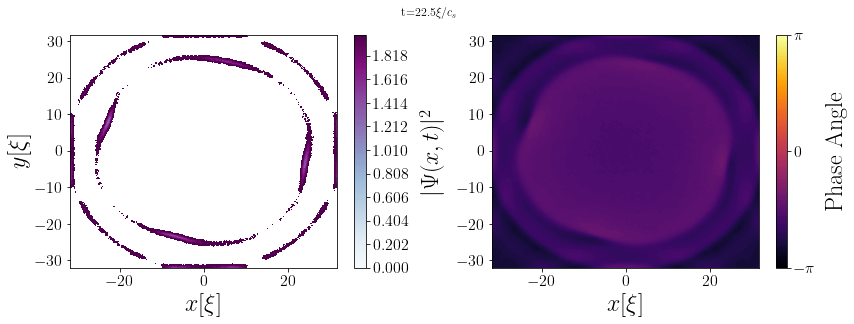

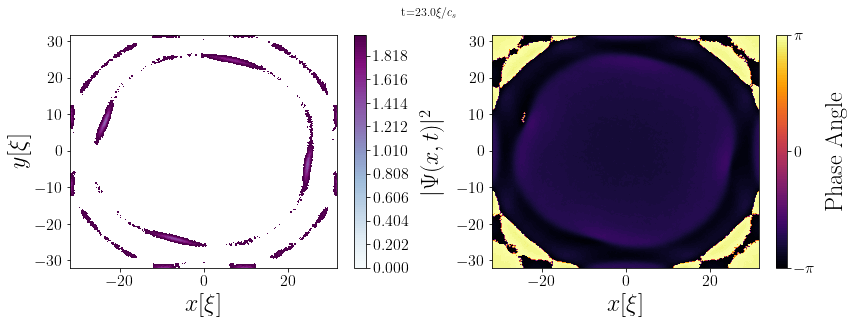

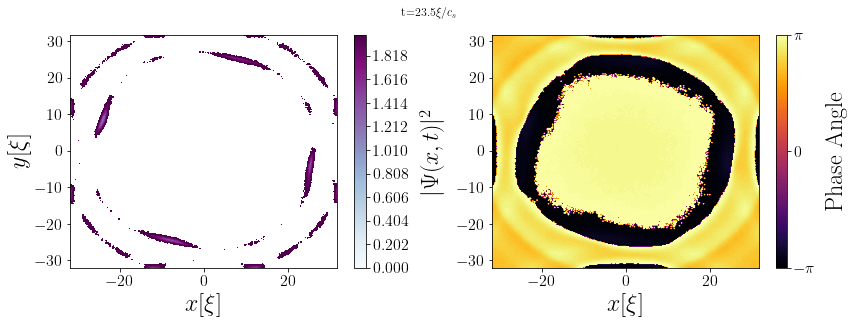

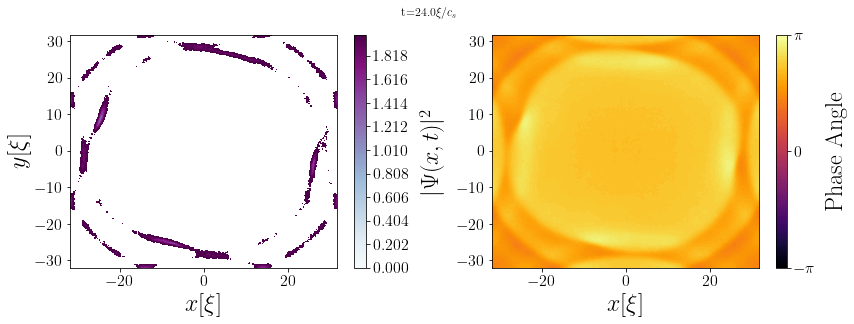

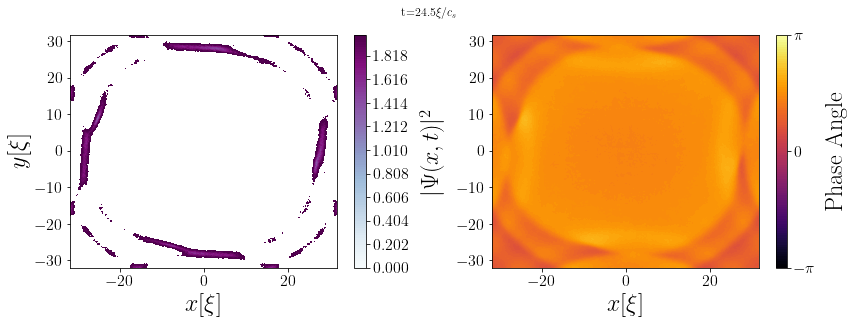

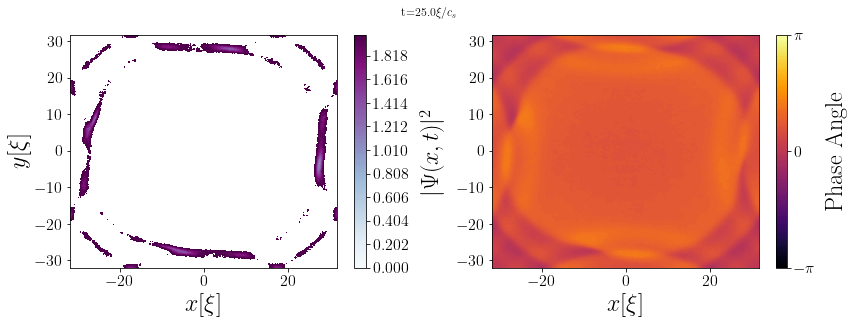

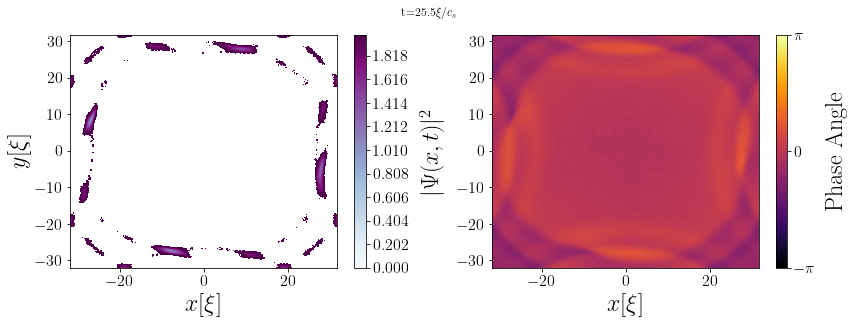

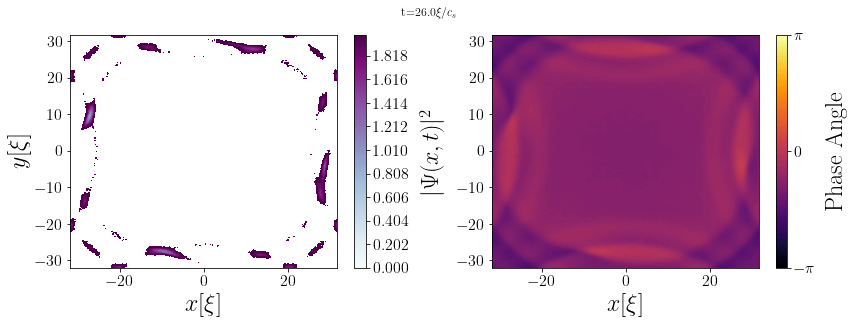

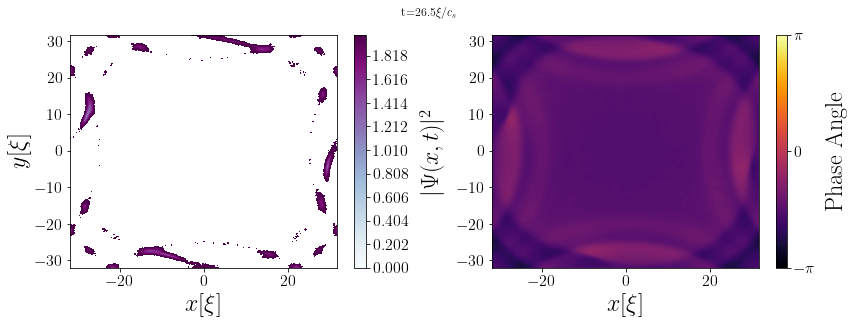

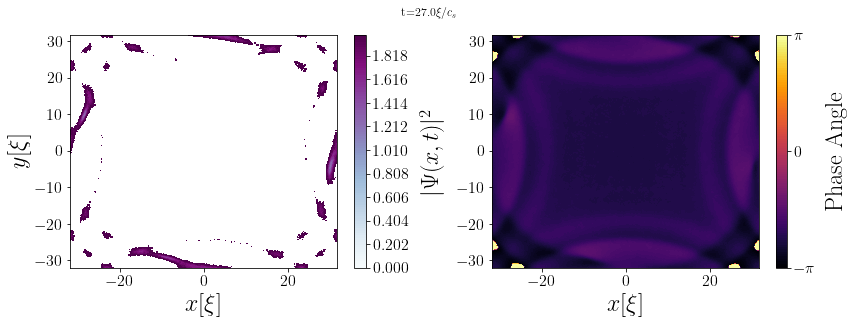

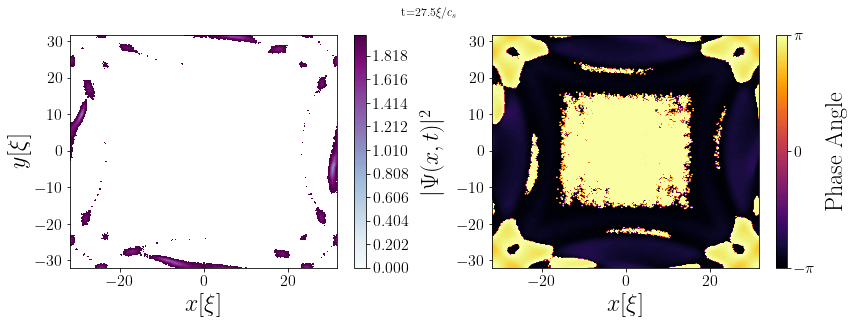

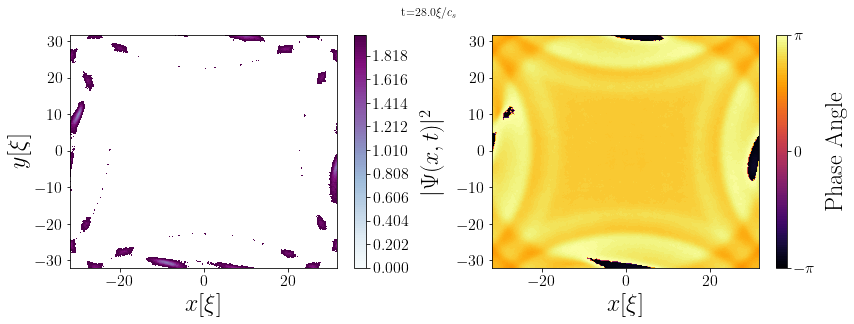

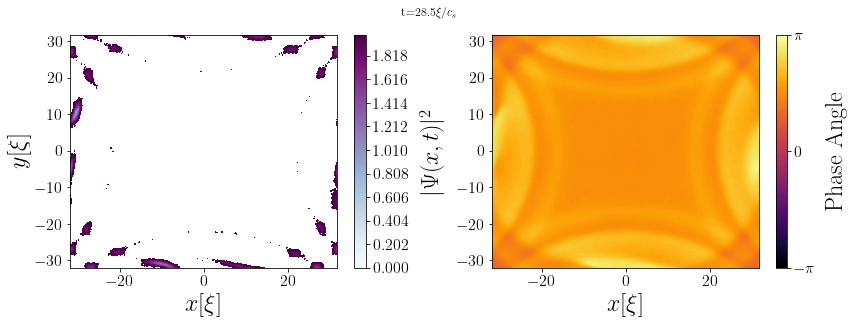

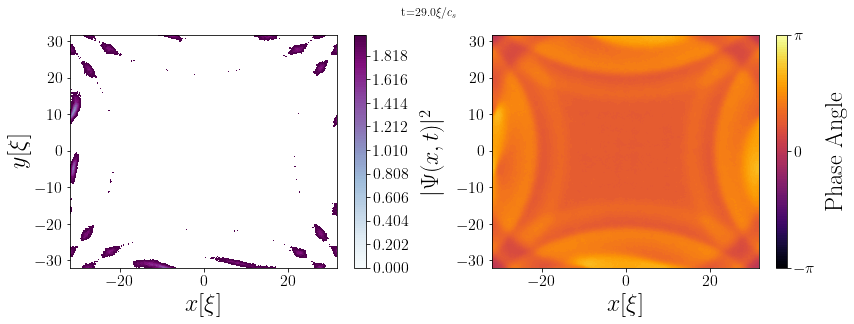

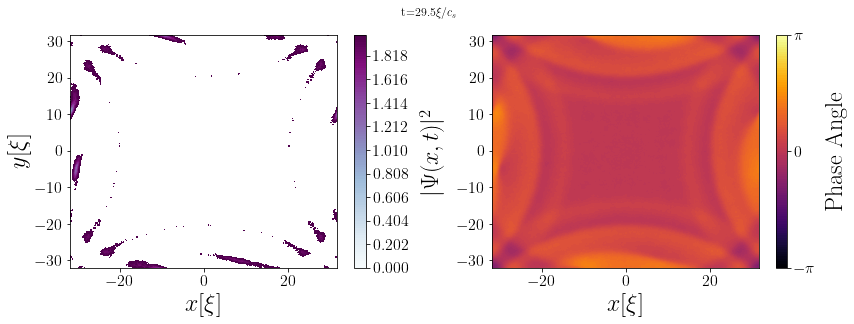

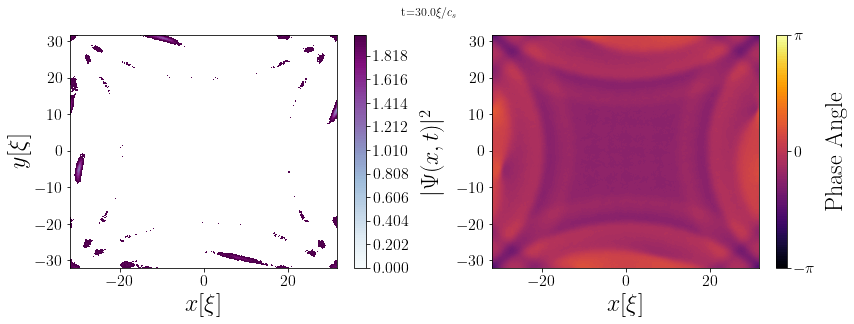

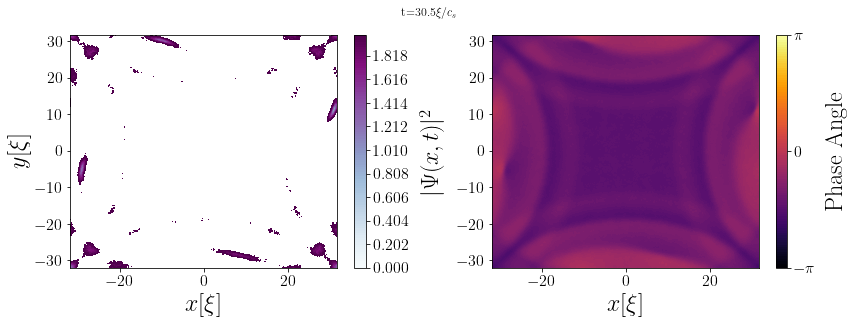

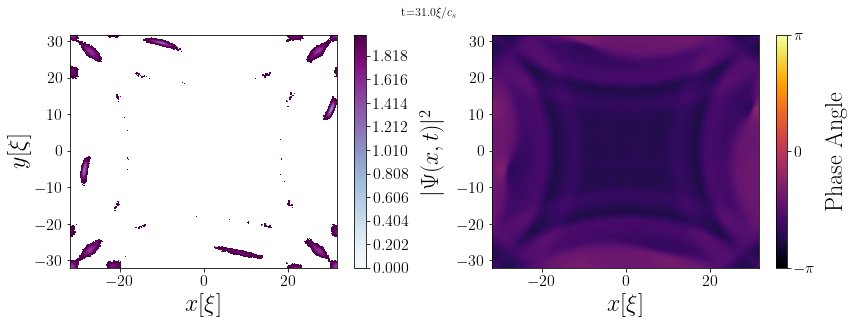

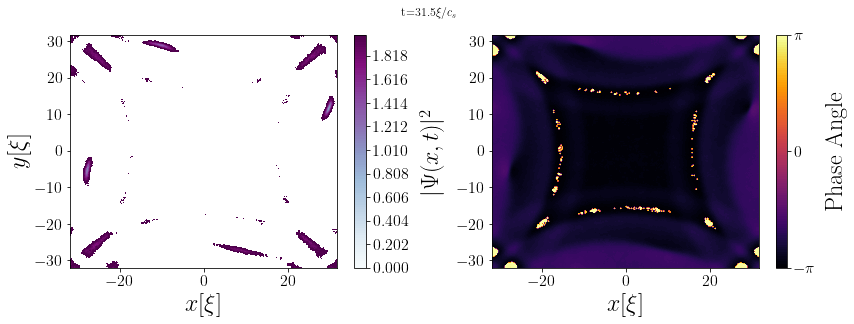

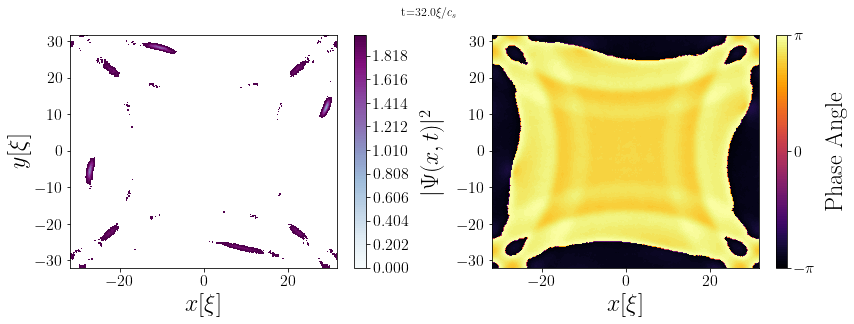

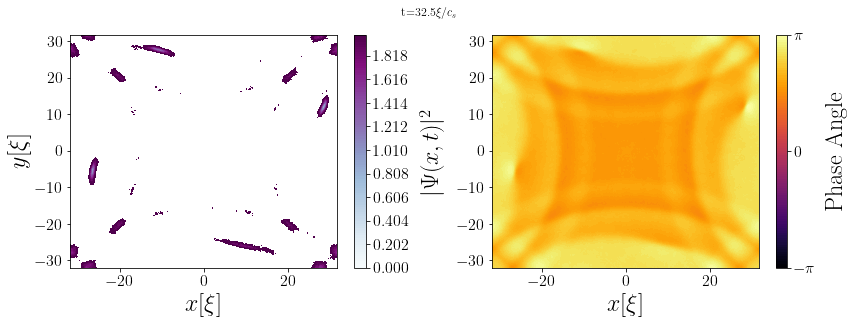

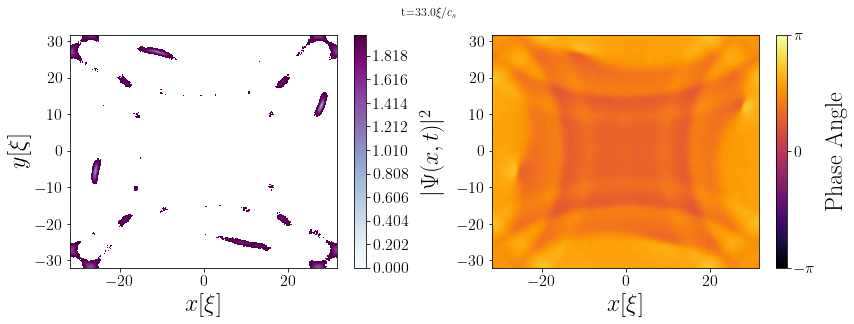

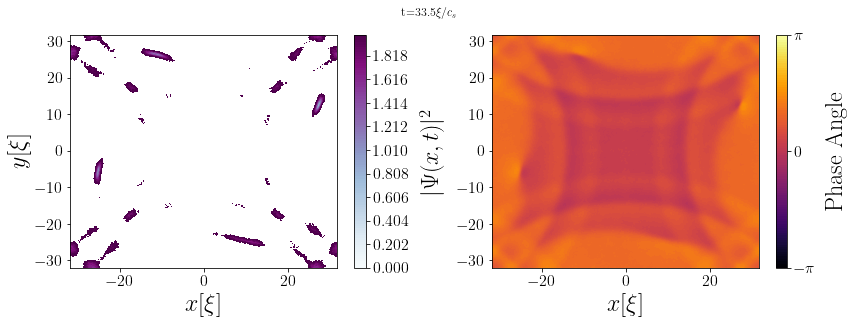

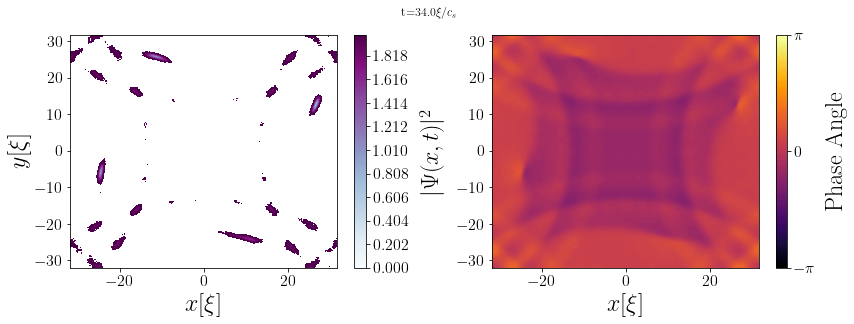

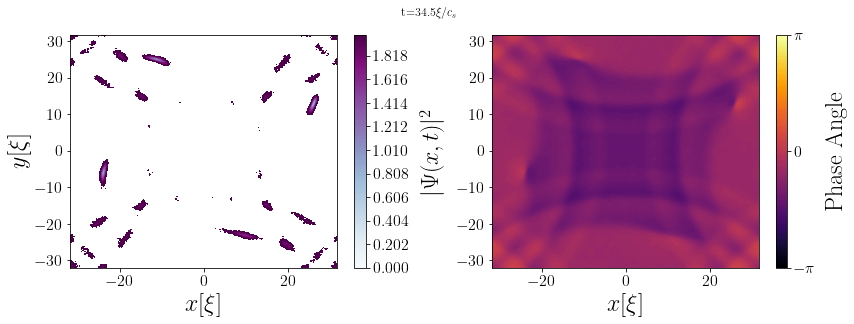

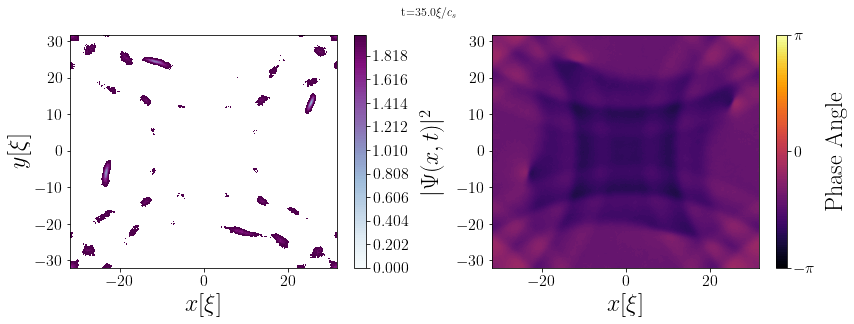

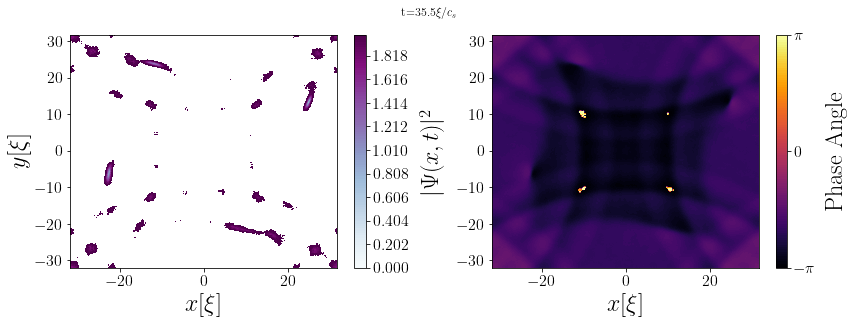

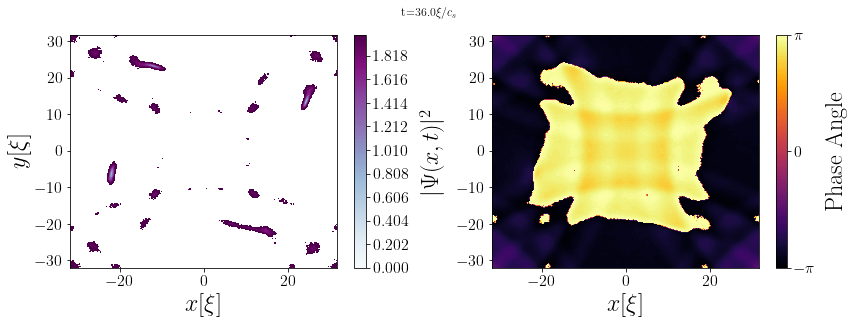

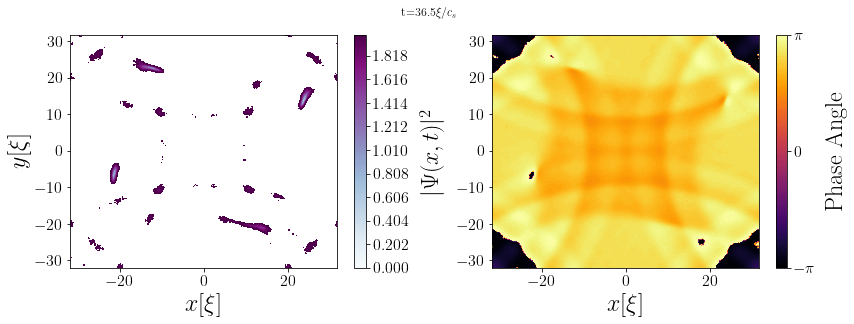

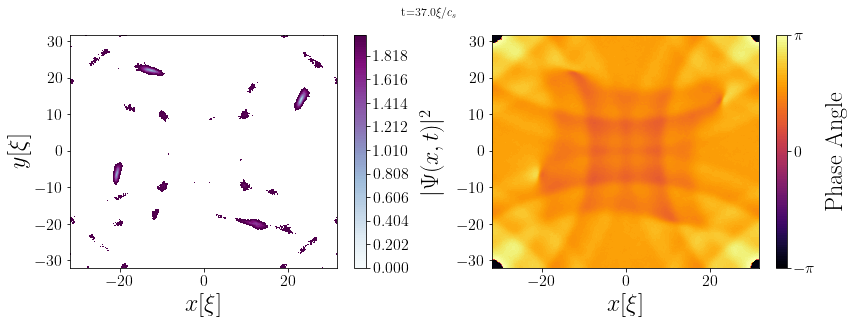

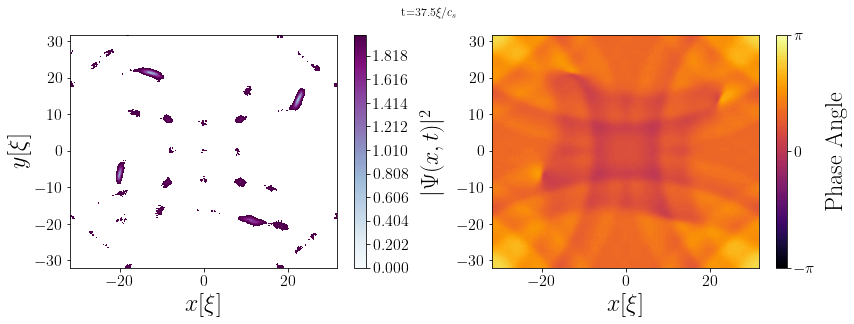

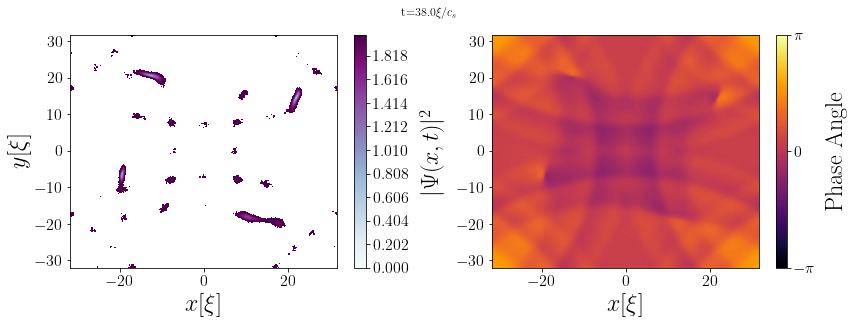

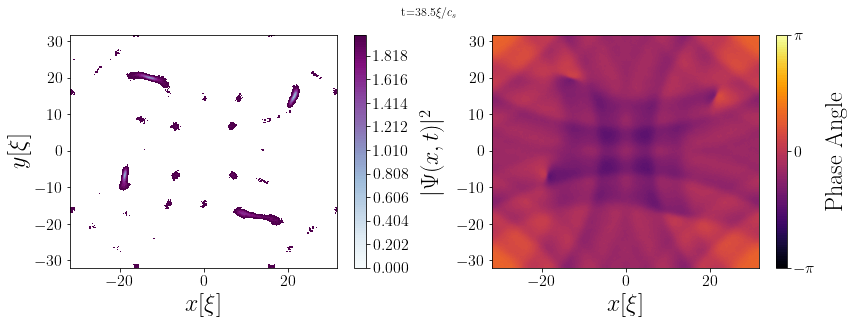

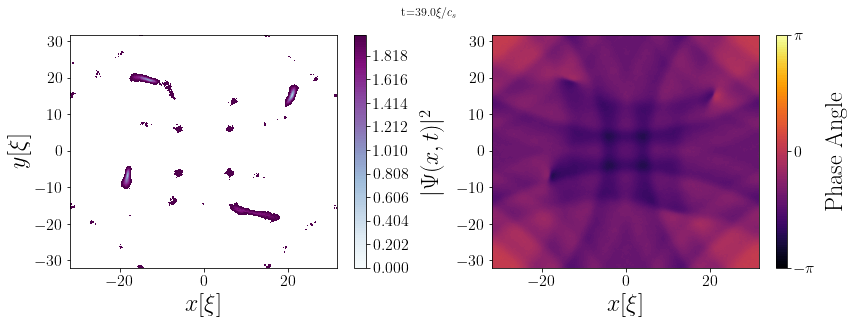

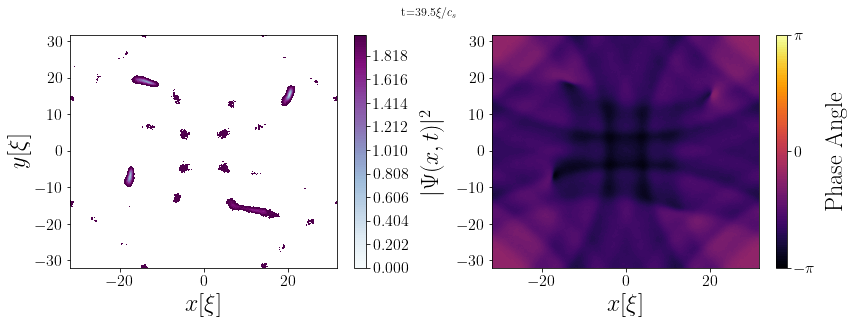

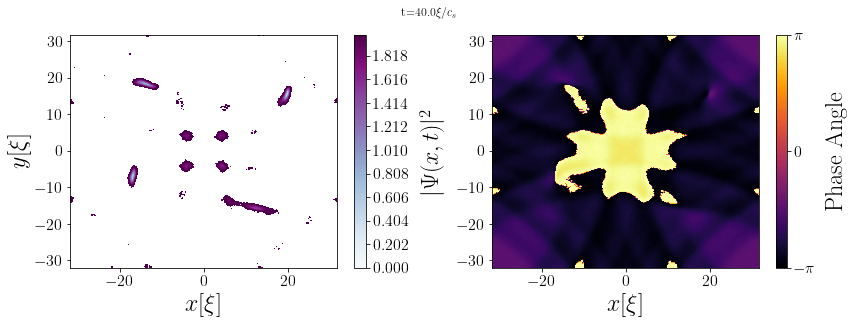

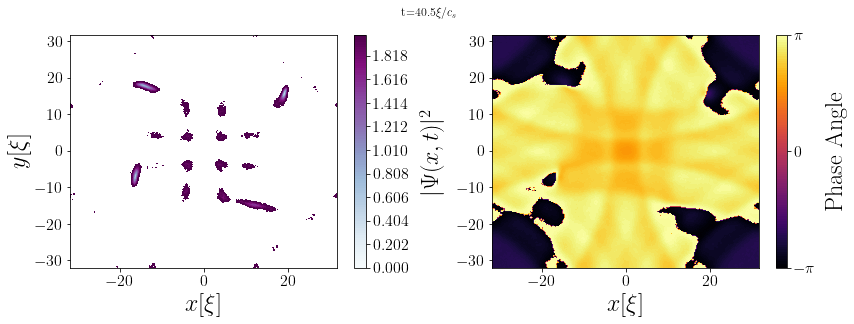

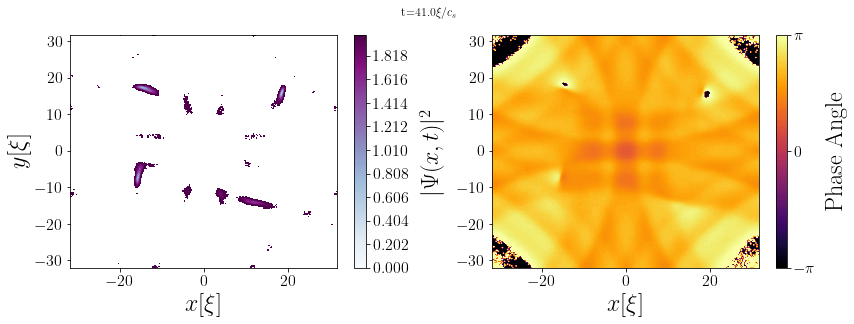

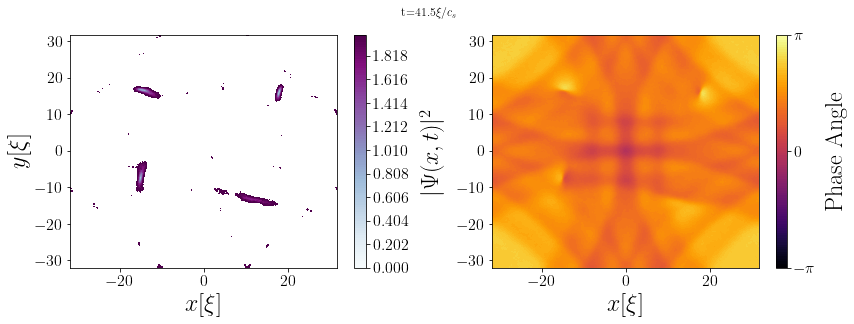

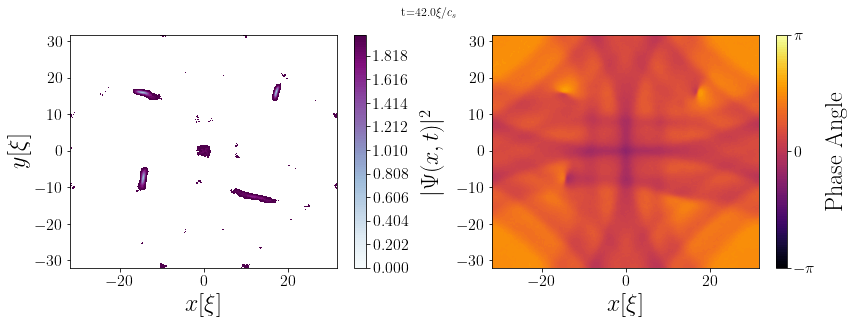

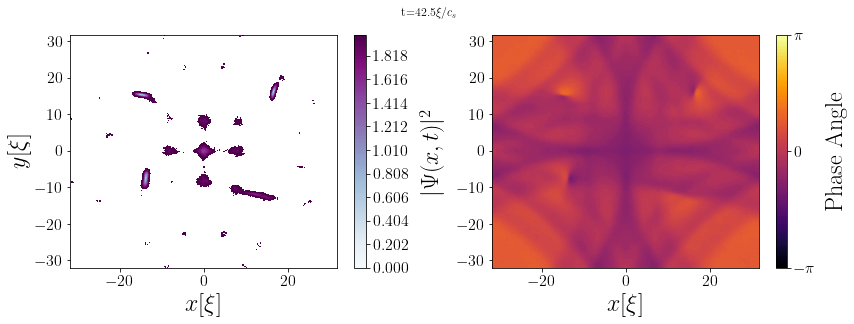

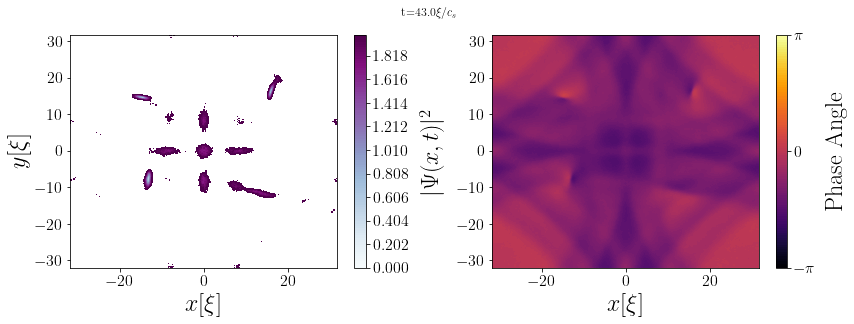

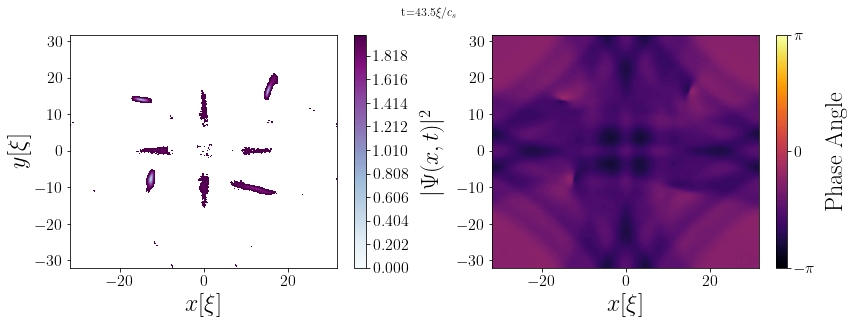

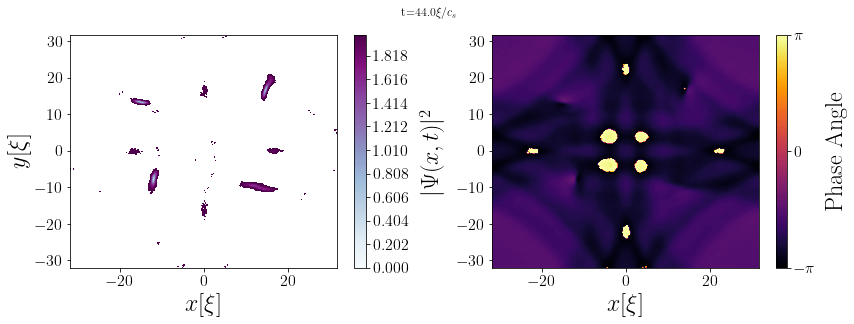

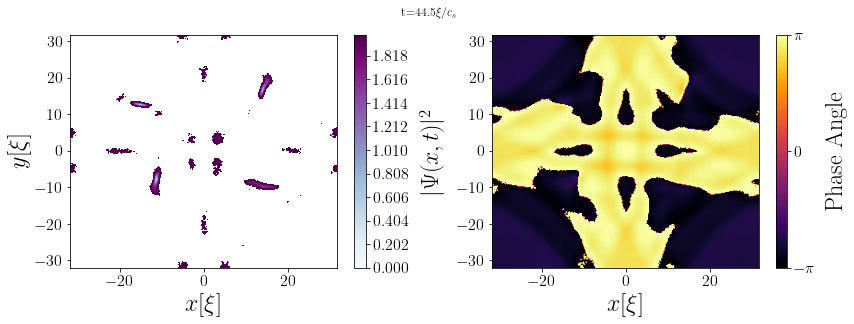

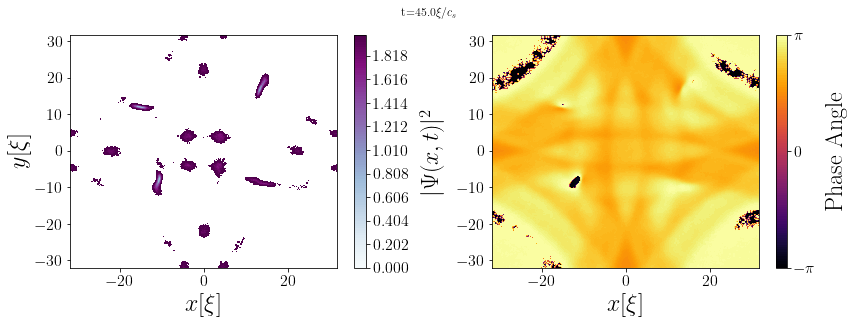

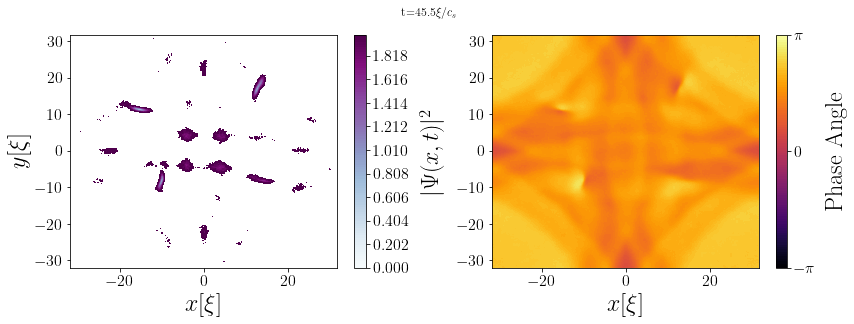

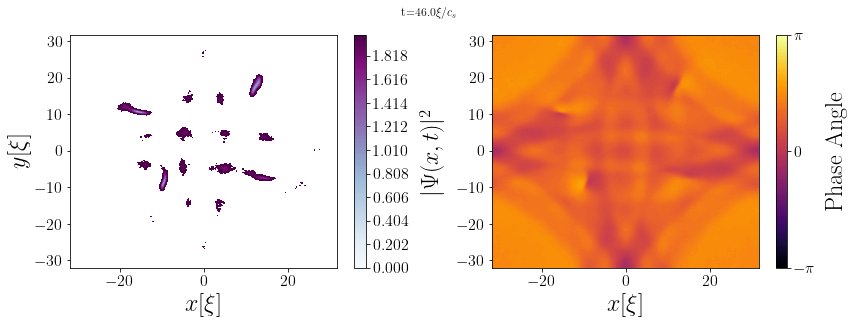

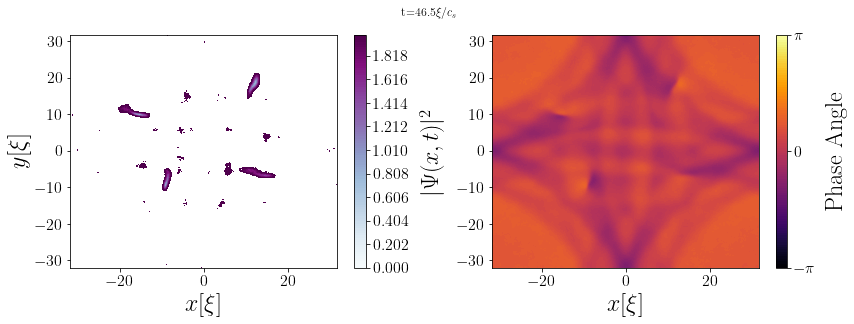

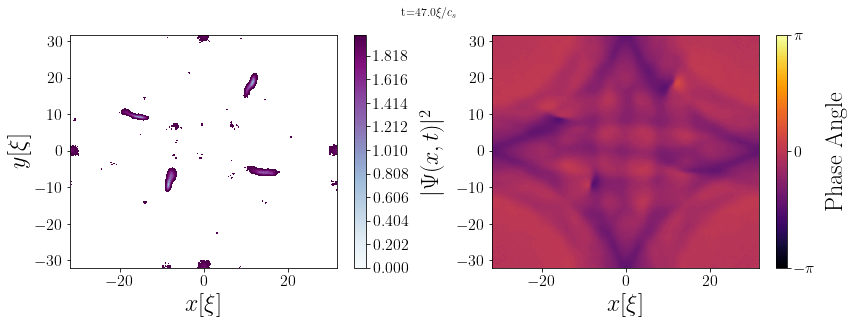

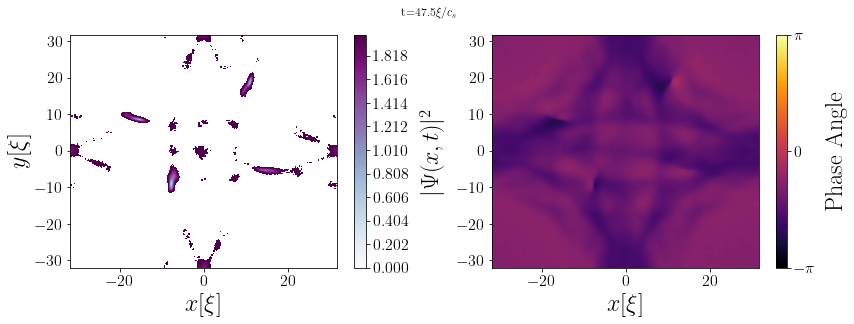

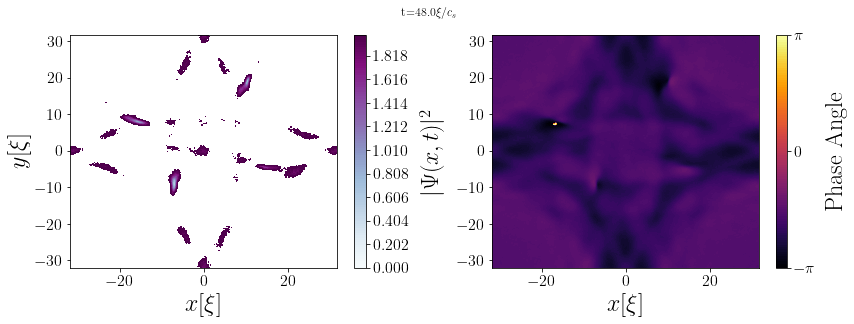

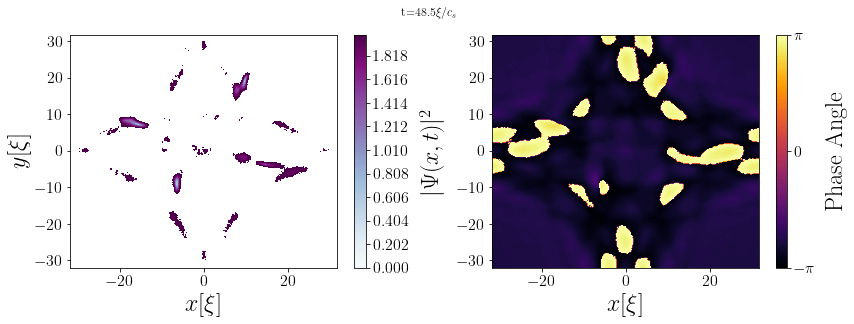

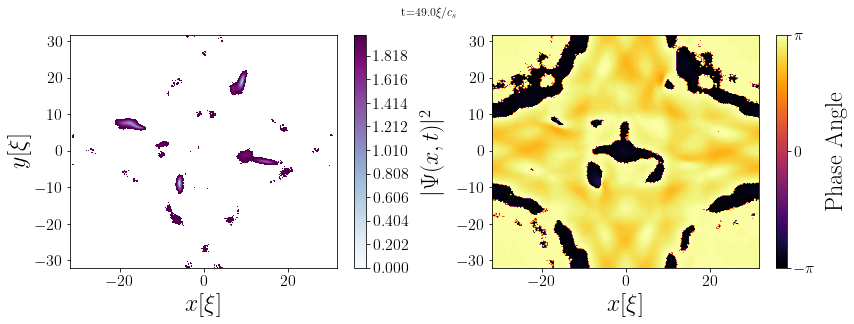

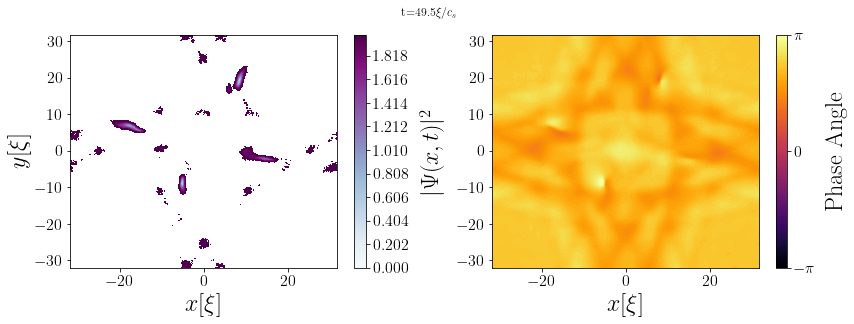

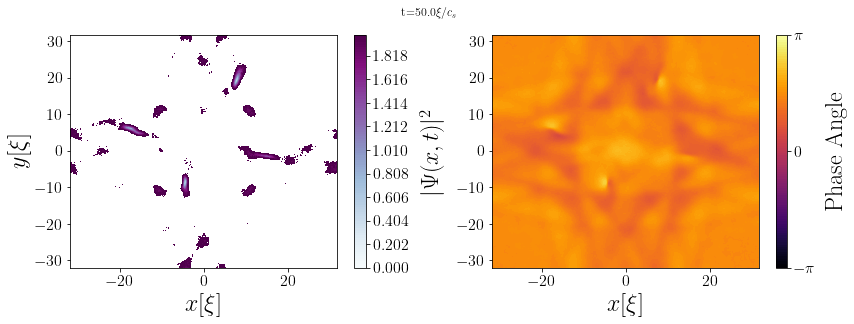

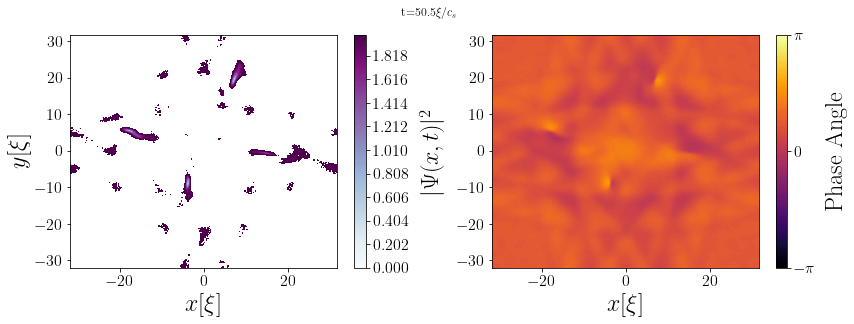

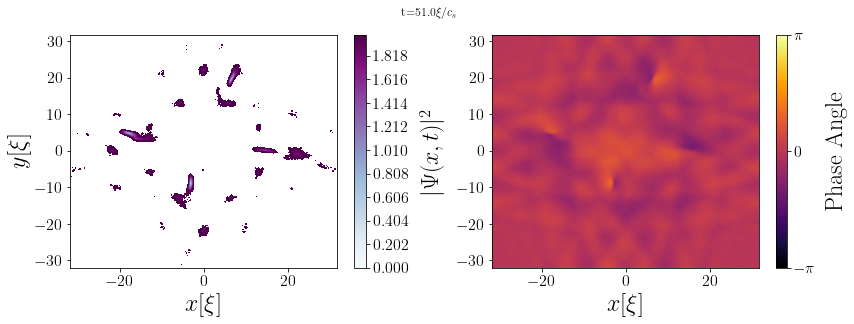

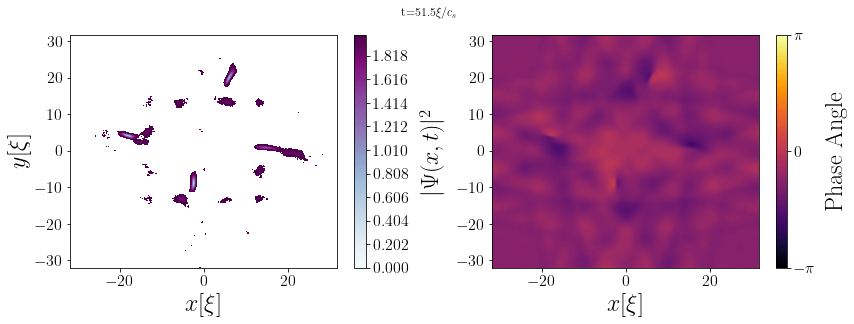

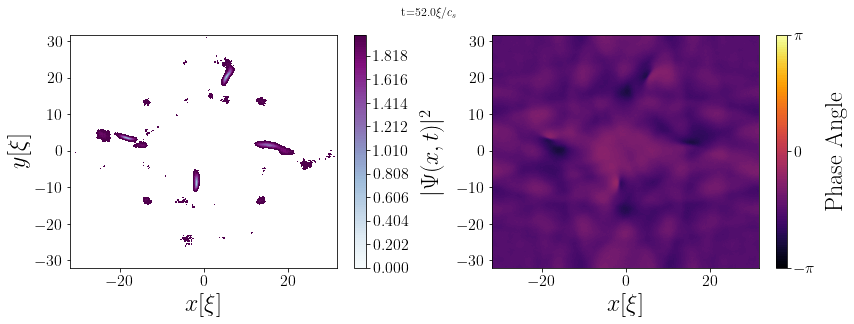

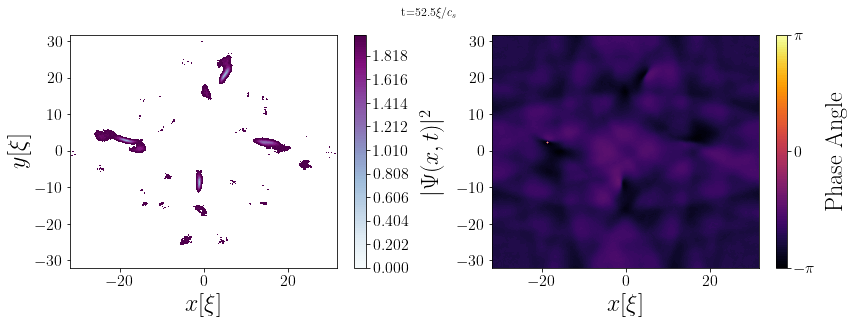

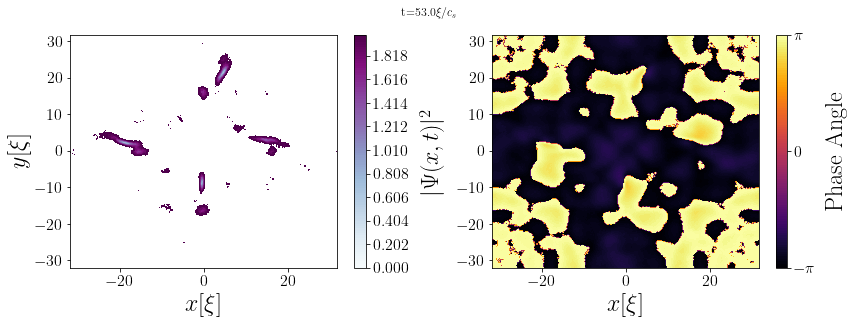

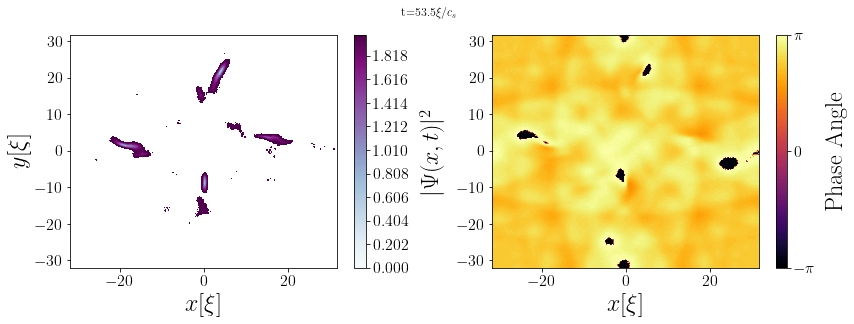

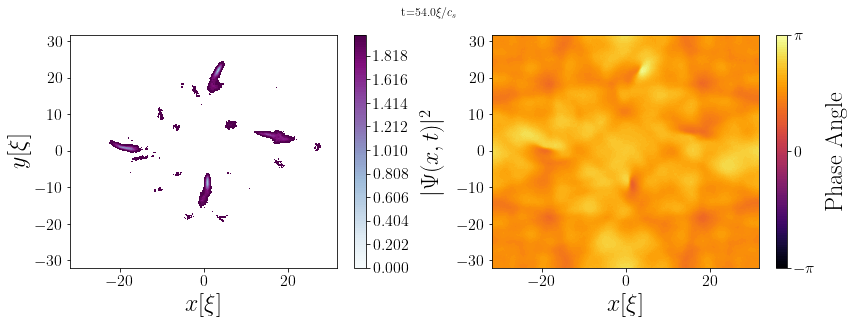

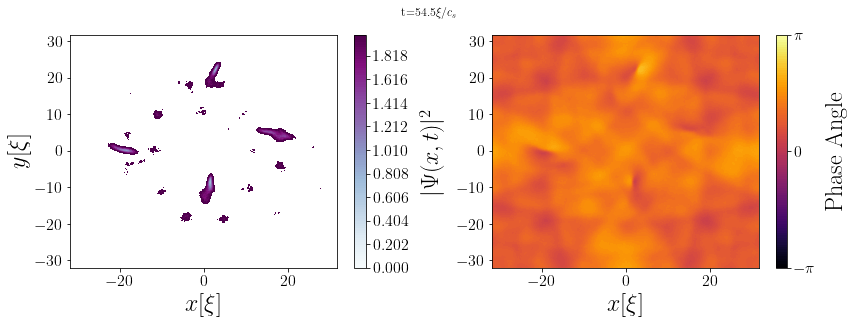

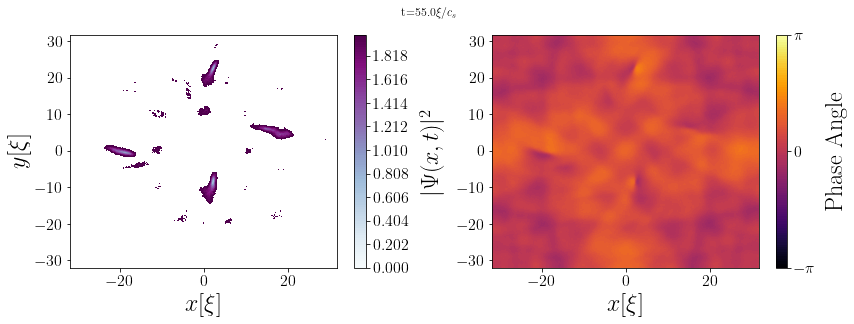

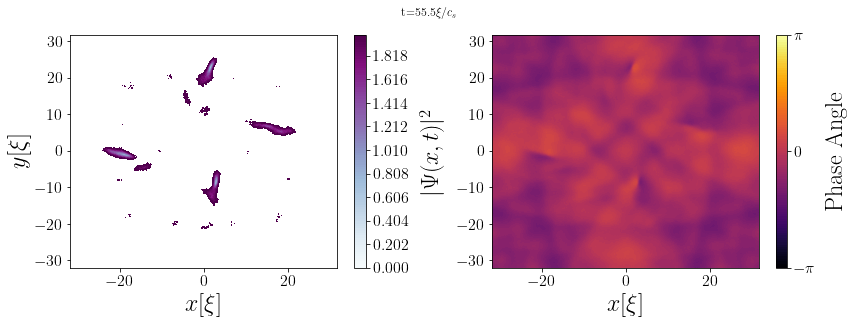

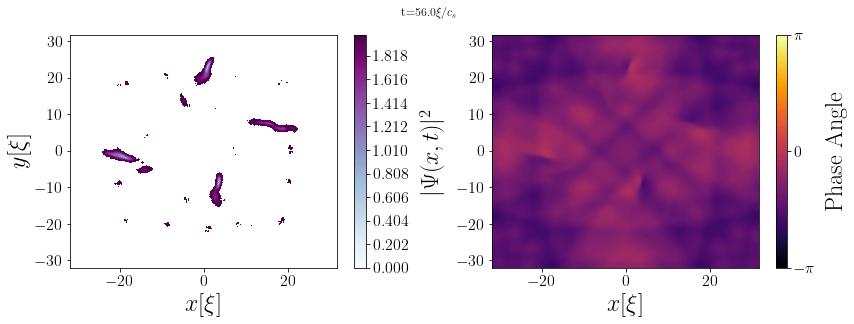

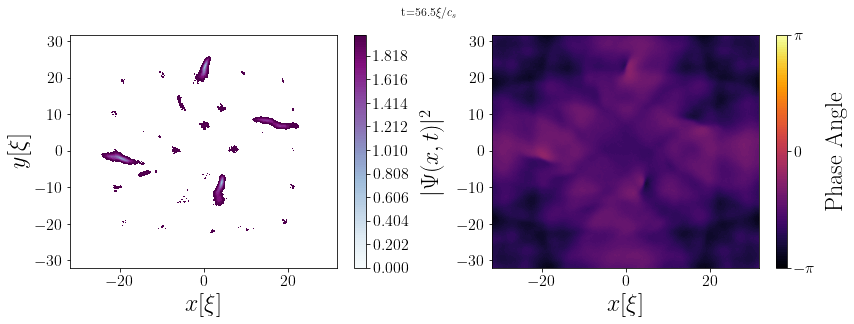

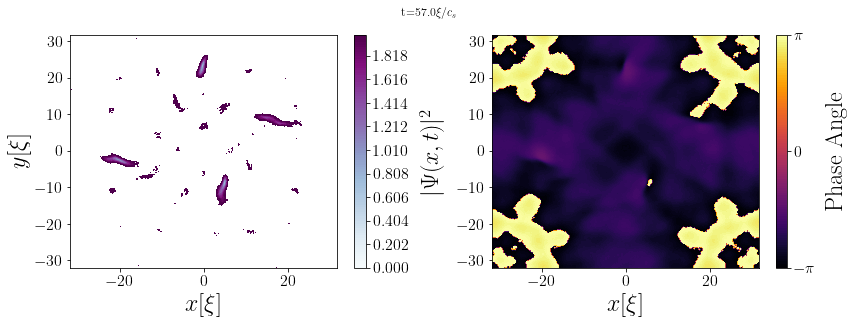

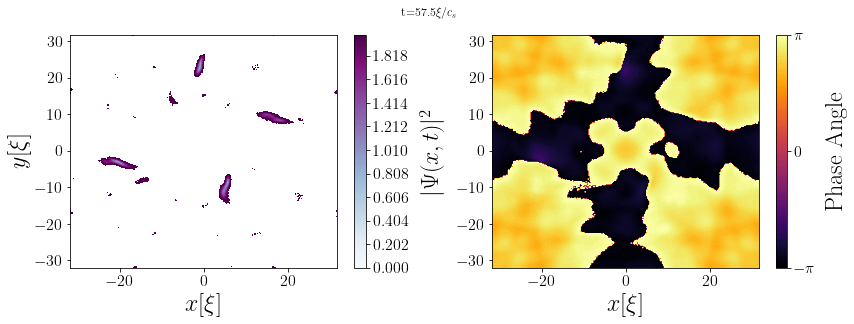

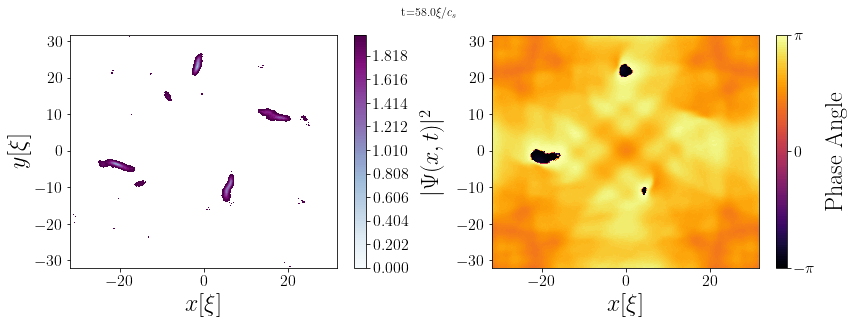

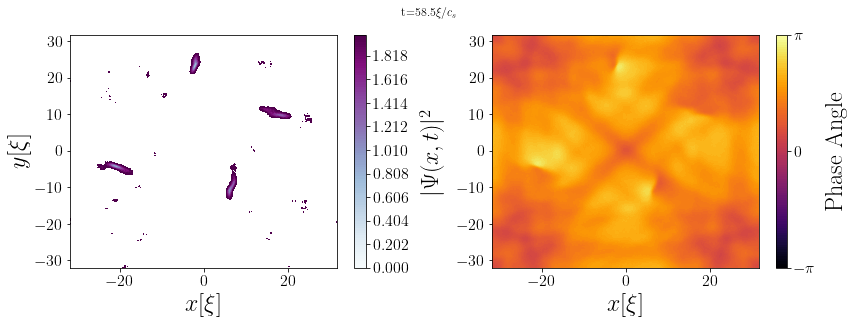

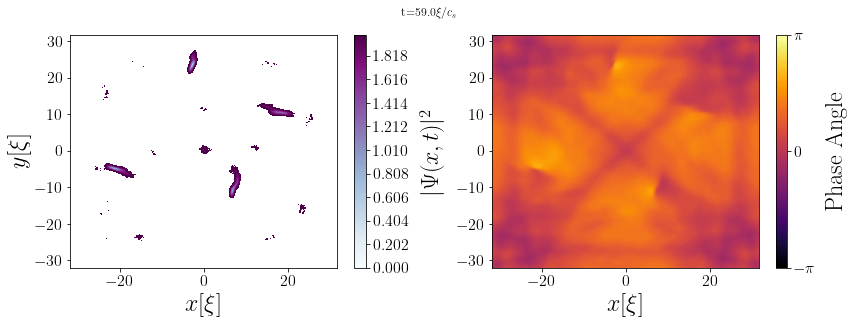

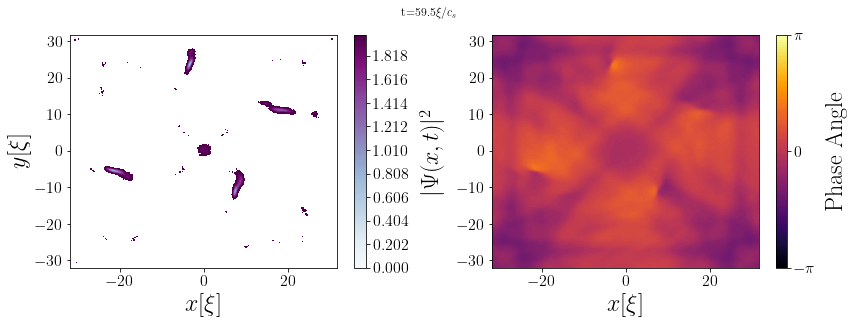

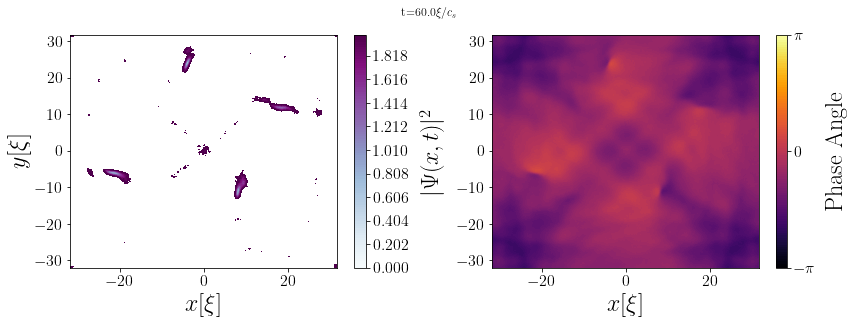

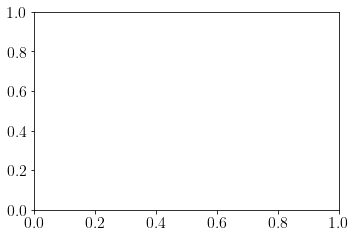

In [202]:
for i in range(len(GPE.prob_densities)):
    fig = plt.figure(figsize=(12,8))

    ax1 = plt.subplot(221)
    cd = ax1.contourf(GPE.x, GPE.y, GPE.prob_densities[i*50,:,:], levels=np.linspace(0, 2, 100), cmap='BuPu')
    cbar = plt.colorbar(cd)
    cbar.ax.set_ylabel(r'$|\Psi(x,t)|^2$', labelpad=10)
    ax1.set_xlabel(r'$x[\xi]$')
    ax1.set_ylabel(r'$y[\xi]$')

    ax2 = plt.subplot(222)
    cd = ax2.contourf(X, Y, np.angle(GPE.psi_x[i*50,:,:]), levels=np.linspace(-np.pi, np.pi, 100), cmap='inferno')
    cbar = plt.colorbar(cd, ticks=[-np.pi, 0, np.pi])
    cbar.ax.set_yticklabels([r'$-\pi$', '0', r'$\pi$'])
    cbar.ax.set_ylabel(r'Phase Angle', labelpad=10)
    ax2.set_xlabel(r'$x[\xi]$')
    plt.suptitle(f't={round(i*50*dT, 2)}'+r'$\xi/c_s$')
    plt.tight_layout()
    
    plt.savefig(figure_path+f'/GPE_2Rings2D{i}.png', dpi=300, bbox_inches='tight')

In [204]:
from PIL import Image
imgs = [Image.open(figure_path+f'/GPE_2Rings2D{i}.png') for i in range(121)]
imgs[0].save(figure_path+"/GPE_2Rings2D.gif", save_all=True, append_images=imgs[1:], duration=80, loop=0)